In [1]:
import os
import cv2
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset

D:\Users\Alex\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import torchvision

import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [3]:
from functions_v2 import(import_train_folder_dataset_2, 
                      Data_2, 
                      plot_loss_accuracy, 
                      accuracy_given_set,
                      import_test_folder_dataset_2,
                      Data_test_2,
                      make_predictions,
                      save_predictions_as_csv,
                      save_model,
                      save_metrics)

# 1. Build your own convolutional neural network using pytorch

In [4]:
# Learning parameters.
epochs = 500 # Number of epochs to train the model
lr = 0.01 # Learning rate. 0.01
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


TRAIN_BATCH_SIZE = 16
TEST_BATCH_SIZE = 8

checkpoints_save = 100 # Save after 100 epochs


model_checkpoints = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Computer Vision/Project/Project 1/CheckPoints/"

cuda


In [5]:
#PyTorch - Building the Model
class ClassificationNet(nn.Module):
    def __init__(self):
        super(ClassificationNet, self).__init__()
        
        '''
        In dimension:              224 * 224 * 3 
        Out dimension Conv:        224 * 224 * 32
        Out dimension MaxPooling:  112 * 112 * 32
        '''
        self.cnn1_model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=9, stride=1, padding=4),
            nn.Dropout2d(p=0.5),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.Dropout2d(p=0.4)
        )
        
        self.cnn1_Res = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=1, stride=1, padding=0) 
        self.batch1 = nn.BatchNorm2d(32)
        self.maxpool1 = nn.MaxPool2d(2, stride=2)
        
        
        '''
        In dimension:              112 * 112 * 32
        Out dimension Conv:        112 * 112 * 64
        Out dimension MaxPooling:  56  * 56  * 64
        '''
        self.cnn2_model = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=9, stride=1, padding=4),
            nn.Dropout2d(p=0.5),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.Dropout2d(p=0.4)
        )
        self.cnn2_Res = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1, stride=1, padding=0) 
        self.batch2 = nn.BatchNorm2d(64)
        self.maxpool2 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              56  * 56  * 64
        Out dimension Conv:        56  * 56  * 128
        Out dimension MaxPooling:  28  * 28  * 128
        '''
        self.cnn3_model = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2),
            nn.Dropout2d(p=0.5),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.Dropout2d(p=0.4)
        )
        self.cnn3_Res = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=1, stride=1, padding=0) 
        self.batch3 = nn.BatchNorm2d(128)
        self.maxpool3 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              28  * 28  * 128
        Out dimension Conv:        28  * 28  * 256
        Out dimension MaxPooling:  14  * 14  * 256
        '''
        self.cnn4_model = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.Dropout2d(p=0.5),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.Dropout2d(p=0.4)
        )
        self.cnn4_Res = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1, stride=1, padding=0) 
        self.batch4 = nn.BatchNorm2d(256)
        self.maxpool4 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              14  * 14  * 256
        Out dimension Conv:        14  * 14  * 512
        Out dimension MaxPooling:  7  * 7  * 512
        '''
        self.cnn5_model = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.Dropout2d(p=0.5),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.Dropout2d(p=0.4)
        )
        self.cnn5_Res = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=1, stride=1, padding=0) 
        self.batch5 = nn.BatchNorm2d(512)
        self.maxpool5 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              7  * 7  * 512
        Out dimension Conv:        7  * 7  * 512
        Out dimension MaxPooling:  3 * 3  * 512
        '''
        self.cnn6_model = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.Dropout2d(p=0.5),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.Dropout2d(p=0.4)
        )
        self.cnn6_Res = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, stride=1, padding=0) 
        self.batch6 = nn.BatchNorm2d(512)
        self.maxpool6 = nn.MaxPool2d(3, stride=2)
        
        
        self.ffnn_model = nn.Sequential(
            nn.Linear(in_features=4608, out_features=512),
            nn.Dropout(0.4),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=4)
        )
        
        
        
    def forward(self, x): 
        
        residual = x
        # Convolution
        x = self.cnn1_model(x)
        # Residual
        residual = self.cnn1_Res(residual)
        x += residual
        x = self.batch1(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool1(x)
        
        
        residual = x
        # Convolution
        x = self.cnn2_model(x)
        # Residual
        residual = self.cnn2_Res(residual)
        x += residual
        x = self.batch2(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool2(x)
        
        
        residual = x
        # Convolution
        x = self.cnn3_model(x)
        # Residual
        residual = self.cnn3_Res(residual)
        x += residual
        x = self.batch3(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool3(x)
        
        
        residual = x
        # Convolution
        x = self.cnn4_model(x)
        # Residual
        residual = self.cnn4_Res(residual)
        x += residual
        x = self.batch4(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool4(x)
        
        
        residual = x
        # Convolution
        x = self.cnn5_model(x)
        # Residual
        residual = self.cnn5_Res(residual)
        x += residual
        x = self.batch5(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool5(x)
        
        
        residual = x
        # Convolution
        x = self.cnn6_model(x)
        # Residual
        residual = self.cnn6_Res(residual)
        x += residual
        x = self.batch6(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool6(x)
        
        x = torch.flatten(x,start_dim=1)
        #print("Flatten Out: ",x.shape)
        x = self.ffnn_model(x)
        #print("ffnn out: ",x.shape)
        x = torch.sigmoid(x)
        #print("Sigmoid Out: ",x.shape)
        return x

In [6]:
#PyTorch - Visualizing the Model
modelpy = ClassificationNet().to(device) # Get the model, and if there is a GPU use it
print("model created")
# Loss function.
criterion = nn.CrossEntropyLoss() # Set the loss function to cross entropy loss
# Optimizer.
optim = torch.optim.SGD(modelpy.parameters(), lr=lr)# , momentum=0.9, weight_decay=1e-3
#optim = torch.optim.Adam(modelpy.parameters(), lr=lr, weight_decay=1e-1)# Set the Optimizer to Adam


# Check if checkpoint is available, if so, load it
epoch_check = 0
previous_time = 0
names = os.listdir(model_checkpoints)
for elem in names:
    if(elem=="model_ckpt.pth"):
        print("Loading save chackpoint")
        checkpoint = torch.load(model_checkpoints + "model_ckpt.pth")
        modelpy.load_state_dict(checkpoint['model_state_dict'])
        modelpy.to(device)
        optim.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch_check = checkpoint['epoch']
        criterion = checkpoint['loss']
        previous_time = checkpoint['time']
        print(f"Epoch of the checkpoint: {epoch_check}")


modelpy

model created


ClassificationNet(
  (cnn1_model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): Dropout2d(p=0.5, inplace=False)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): Dropout2d(p=0.4, inplace=False)
  )
  (cnn1_Res): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1))
  (batch1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2_model): Sequential(
    (0): Conv2d(32, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): Dropout2d(p=0.5, inplace=False)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): Dropout2d(p=0.4, inplace=False)


In [22]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"Model Parameters: {count_parameters(modelpy)}")

Model Parameters: 18547716


# Load Data

In [7]:
# Path of the files
train_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Artificial Intelligence/Projects/Project 1/data/Train"
test_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Artificial Intelligence/Projects/Project 1/data/Test"

In [8]:
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomRotation((-20,20)),
                                    transforms.Resize((275, 275)),
                                    #transforms.CenterCrop((224, 224)),
                                    transforms.RandomCrop((224, 224)),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

img_transform_val = transforms.Compose([transforms.ToPILImage(),
                                        transforms.Resize((224, 224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])



img_transform_2 = transforms.Compose([transforms.ToPILImage(),
                                    transforms.AutoAugment(),
                                    transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


In [9]:
# Import the data into a resized 224x224 images
size_of_resized_img = (224,224) 
train_data, train_labels = import_train_folder_dataset_2(train_data_path, resized_side=size_of_resized_img)
print("Dim of Data: ", train_data.shape)
print("Dim of Lables: ", train_labels.shape)

Dim of Data:  (1149, 224, 224, 3)
Dim of Lables:  (1149,)


In [10]:
# Split into Train, Validation
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
print("Dim of Data: ", X_train.shape)
print("Dim of Lables: ", y_train.shape)
print("Dim of X_test: ", X_val.shape)
print("Dim of y_test: ", y_val.shape)

Dim of Data:  (1034, 224, 224, 3)
Dim of Lables:  (1034,)
Dim of X_test:  (115, 224, 224, 3)
Dim of y_test:  (115,)


In [11]:
# Create the dataset object
train_Dataset = Data_2(X_train, y_train, img_transform) # img_transform_2 img_transform
val_Dataset = Data_2(X_val, y_val, img_transform_val)

print("Train len: ",len(train_Dataset))
print("Val len: ",len(val_Dataset))

Train len:  1034
Val len:  115


In [12]:
# Create the dataloaders
train_loader = DataLoader(
    train_Dataset, 
    batch_size=TRAIN_BATCH_SIZE,             
    shuffle=True)

valid_loader = DataLoader(
    val_Dataset, 
    batch_size=TEST_BATCH_SIZE,
    shuffle=False
    )

In [13]:
print("Type of object: ",type(train_loader))

print()
print( 'Train Size: ' + str(len(train_loader)))
print( 'Validate Size: ' + str(len(valid_loader)))

print()
print("Content of one element: ",iter(train_loader).next())

print()
print("Type of one element: ", type(iter(train_loader).next()))
print("Length of one element: ", len(iter(train_loader).next()))

print()
print('Input tensors size: ' + str(iter(train_loader).next()[0].shape)) # Input: 16, 16875 | 16 train batch size, 16875 = 75x75 image dimension, 3 channels (colors) 
print('Label tensors size: ' + str(iter(train_loader).next()[1].shape)) # Label: 16 | 16 train Batch size


print()
print('Input tensors size: ' + str(iter(valid_loader).next()[0].shape)) # Input: 8, 16875 | 8 validation batch size, 16875 = 75x75 image dimension, 3 channels (colors) 
print('Label tensors size: ' + str(iter(valid_loader).next()[1].shape)) # Label: 8 | 8 validation Batch size


Type of object:  <class 'torch.utils.data.dataloader.DataLoader'>

Train Size: 65
Validate Size: 15

Content of one element:  [tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-1.3644, -1.3987, -1.4158,  ..., -1.9809, -1.9638, -1.9638],
          [-1.3644, -1.3987, -1.4158,  ..., -1.9467, -1.9638, -1.9809],
          [-1.3987, -1.4158, -1.4158,  ..., -1.9295, -1.9638, -1.9980]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-1.0728, -1.0903, -1.1078,  ..., -1.8081, -1.8081, -1.7906],
          [-1.0728, -1.0903, -1.0903,  ..., -1.7731, -1.8081, -1.8256],
          [-1.1078, -1.0903, -1.0903,  ..., -1.75

# 2. Train your model using cow teat datasets (you may need to use  Google Colab (or Kaggle) with GPU to train your code) 


Epoch 1 of 500


100%|██████████| 15/15 [00:05<00:00,  2.84it/s]


train loss:  0.07532155617523931
Val loss:  0.15377542765244193
train accuracy:  0.4922630560928433
Val accuracy:  0.45217391304347826
Current time: 5.122 minutes. Time expected till completion: 2555.949 minutes

Epoch 2 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.07222346860619994
Val loss:  0.15075058937072755
train accuracy:  0.4381044487427466
Val accuracy:  0.45217391304347826
Current time: 5.964 minutes. Time expected till completion: 1484.952 minutes

Epoch 3 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.07067900469501429
Val loss:  0.15144483110179072
train accuracy:  0.45164410058027077
Val accuracy:  0.45217391304347826
Current time: 6.739 minutes. Time expected till completion: 1116.395 minutes

Epoch 4 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.07001638677641317
Val loss:  0.14834501432335895
train accuracy:  0.4748549323017408
Val accuracy:  0.46956521739130436
Current time: 7.513 minutes. Time expected till completion: 931.655 minutes

Epoch 5 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06963889891681634
Val loss:  0.14644479958907416
train accuracy:  0.5029013539651838
Val accuracy:  0.5043478260869565
Current time: 8.288 minutes. Time expected till completion: 820.548 minutes

Epoch 6 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06928658623759935
Val loss:  0.14580326391303022
train accuracy:  0.5106382978723404
Val accuracy:  0.5304347826086957
Current time: 9.063 minutes. Time expected till completion: 746.206 minutes

Epoch 7 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.06940276093593649
Val loss:  0.1457017286964085
train accuracy:  0.52321083172147
Val accuracy:  0.5391304347826087
Current time: 9.842 minutes. Time expected till completion: 693.191 minutes

Epoch 8 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.0694215138599536
Val loss:  0.14804137997005296
train accuracy:  0.5454545454545454
Val accuracy:  0.5043478260869565
Current time: 10.616 minutes. Time expected till completion: 652.906 minutes

Epoch 9 of 500


100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


train loss:  0.06917276044648206
Val loss:  0.1449778422065403
train accuracy:  0.5473887814313346
Val accuracy:  0.5478260869565217
Current time: 11.391 minutes. Time expected till completion: 621.430 minutes

Epoch 10 of 500


100%|██████████| 15/15 [00:02<00:00,  6.33it/s]


train loss:  0.06912985887933285
Val loss:  0.14437467740929644
train accuracy:  0.562862669245648
Val accuracy:  0.5826086956521739
Current time: 12.165 minutes. Time expected till completion: 596.097 minutes

Epoch 11 of 500


100%|██████████| 15/15 [00:02<00:00,  6.31it/s]


train loss:  0.06919133190490752
Val loss:  0.14520567551903102
train accuracy:  0.574468085106383
Val accuracy:  0.5565217391304348
Current time: 12.942 minutes. Time expected till completion: 575.332 minutes

Epoch 12 of 500


100%|██████████| 15/15 [00:02<00:00,  6.31it/s]


train loss:  0.06858399931190093
Val loss:  0.14459144395330678
train accuracy:  0.5773694390715667
Val accuracy:  0.6
Current time: 13.717 minutes. Time expected till completion: 557.818 minutes

Epoch 13 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.0686383571338838
Val loss:  0.14427612449811852
train accuracy:  0.5851063829787234
Val accuracy:  0.591304347826087
Current time: 14.496 minutes. Time expected till completion: 543.034 minutes

Epoch 14 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.0686217695186401
Val loss:  0.14462537713672804
train accuracy:  0.597678916827853
Val accuracy:  0.6086956521739131
Current time: 15.269 minutes. Time expected till completion: 530.043 minutes

Epoch 15 of 500


100%|██████████| 15/15 [00:02<00:00,  6.32it/s]


train loss:  0.06895432354633767
Val loss:  0.14521392583847045
train accuracy:  0.5957446808510638
Val accuracy:  0.6086956521739131
Current time: 16.043 minutes. Time expected till completion: 518.734 minutes

Epoch 16 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.06867902767727407
Val loss:  0.1444479781648387
train accuracy:  0.5841392649903289
Val accuracy:  0.6086956521739131
Current time: 16.817 minutes. Time expected till completion: 508.702 minutes

Epoch 17 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.06892408387342781
Val loss:  0.1440593097520911
train accuracy:  0.59284332688588
Val accuracy:  0.6086956521739131
Current time: 17.592 minutes. Time expected till completion: 499.814 minutes

Epoch 18 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.0685606412661606
Val loss:  0.14391519712365192
train accuracy:  0.5938104448742747
Val accuracy:  0.6260869565217392
Current time: 18.365 minutes. Time expected till completion: 491.767 minutes

Epoch 19 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06883172365175687
Val loss:  0.14428458472956782
train accuracy:  0.5938104448742747
Val accuracy:  0.6086956521739131
Current time: 19.140 minutes. Time expected till completion: 484.539 minutes

Epoch 20 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.06852517373557247
Val loss:  0.143719062079554
train accuracy:  0.5996131528046421
Val accuracy:  0.6086956521739131
Current time: 19.916 minutes. Time expected till completion: 477.980 minutes

Epoch 21 of 500


100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


train loss:  0.06853901728901227
Val loss:  0.14296128594357035
train accuracy:  0.6005802707930368
Val accuracy:  0.6434782608695652
Current time: 20.689 minutes. Time expected till completion: 471.896 minutes

Epoch 22 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06847011893122985
Val loss:  0.14296364369599715
train accuracy:  0.6034816247582205
Val accuracy:  0.6347826086956522
Current time: 21.462 minutes. Time expected till completion: 466.301 minutes

Epoch 23 of 500


100%|██████████| 15/15 [00:02<00:00,  6.33it/s]


train loss:  0.06819983135109021
Val loss:  0.1428762549939363
train accuracy:  0.6073500967117988
Val accuracy:  0.6347826086956522
Current time: 22.236 minutes. Time expected till completion: 461.164 minutes

Epoch 24 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06807284492358018
Val loss:  0.14363873575044714
train accuracy:  0.6131528046421664
Val accuracy:  0.6347826086956522
Current time: 23.010 minutes. Time expected till completion: 456.364 minutes

Epoch 25 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06821387683399872
Val loss:  0.1429412727770598
train accuracy:  0.6083172147001934
Val accuracy:  0.6434782608695652
Current time: 23.783 minutes. Time expected till completion: 451.878 minutes

Epoch 26 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.06783446600404883
Val loss:  0.14255581835041875
train accuracy:  0.6199226305609284
Val accuracy:  0.6608695652173913
Current time: 24.556 minutes. Time expected till completion: 447.682 minutes

Epoch 27 of 500


100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


train loss:  0.0679133912580848
Val loss:  0.14269272866456406
train accuracy:  0.6218568665377177
Val accuracy:  0.6434782608695652
Current time: 25.331 minutes. Time expected till completion: 443.760 minutes

Epoch 28 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06770153548316292
Val loss:  0.14096093540606291
train accuracy:  0.6228239845261122
Val accuracy:  0.6434782608695652
Current time: 26.104 minutes. Time expected till completion: 440.040 minutes

Epoch 29 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.0677200153441217
Val loss:  0.14240589504656584
train accuracy:  0.6170212765957447
Val accuracy:  0.6434782608695652
Current time: 26.877 minutes. Time expected till completion: 436.513 minutes

Epoch 30 of 500


100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


train loss:  0.06732806580670797
Val loss:  0.14153458864792534
train accuracy:  0.6237911025145068
Val accuracy:  0.6434782608695652
Current time: 27.651 minutes. Time expected till completion: 433.197 minutes

Epoch 31 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.0673443267492999
Val loss:  0.14208211121351821
train accuracy:  0.6247582205029013
Val accuracy:  0.6434782608695652
Current time: 28.423 minutes. Time expected till completion: 430.017 minutes

Epoch 32 of 500


100%|██████████| 15/15 [00:02<00:00,  6.31it/s]


train loss:  0.06748236712911374
Val loss:  0.14182863805605017
train accuracy:  0.625725338491296
Val accuracy:  0.6521739130434783
Current time: 29.197 minutes. Time expected till completion: 427.011 minutes

Epoch 33 of 500


100%|██████████| 15/15 [00:02<00:00,  6.31it/s]


train loss:  0.06728745008345037
Val loss:  0.14088169647299725
train accuracy:  0.6179883945841392
Val accuracy:  0.6521739130434783
Current time: 29.971 minutes. Time expected till completion: 424.129 minutes

Epoch 34 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06739454666004882
Val loss:  0.14082455531410548
train accuracy:  0.6150870406189555
Val accuracy:  0.6434782608695652
Current time: 30.743 minutes. Time expected till completion: 421.360 minutes

Epoch 35 of 500


100%|██████████| 15/15 [00:02<00:00,  6.32it/s]


train loss:  0.0668234516158556
Val loss:  0.14112923663595447
train accuracy:  0.6218568665377177
Val accuracy:  0.6608695652173913
Current time: 31.515 minutes. Time expected till completion: 418.705 minutes

Epoch 36 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06716335298244912
Val loss:  0.1422494235246078
train accuracy:  0.6334622823984526
Val accuracy:  0.6521739130434783
Current time: 32.288 minutes. Time expected till completion: 416.153 minutes

Epoch 37 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06740780235259168
Val loss:  0.1403640627861023
train accuracy:  0.6199226305609284
Val accuracy:  0.6434782608695652
Current time: 33.063 minutes. Time expected till completion: 413.730 minutes

Epoch 38 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06650646281657413
Val loss:  0.14066560838533484
train accuracy:  0.625725338491296
Val accuracy:  0.6521739130434783
Current time: 33.841 minutes. Time expected till completion: 411.432 minutes

Epoch 39 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.0669486533627058
Val loss:  0.13959651356158048
train accuracy:  0.6150870406189555
Val accuracy:  0.6521739130434783
Current time: 34.617 minutes. Time expected till completion: 409.188 minutes

Epoch 40 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06670836236767427
Val loss:  0.14110387771025948
train accuracy:  0.6237911025145068
Val accuracy:  0.6521739130434783
Current time: 35.392 minutes. Time expected till completion: 407.012 minutes

Epoch 41 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06664128062572885
Val loss:  0.1405747978583626
train accuracy:  0.620889748549323
Val accuracy:  0.6521739130434783
Current time: 36.168 minutes. Time expected till completion: 404.908 minutes

Epoch 42 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06668620707910342
Val loss:  0.1415423025255618
train accuracy:  0.6237911025145068
Val accuracy:  0.6608695652173913
Current time: 36.944 minutes. Time expected till completion: 402.863 minutes

Epoch 43 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06706902413580358
Val loss:  0.13919597449509993
train accuracy:  0.6160541586073501
Val accuracy:  0.6521739130434783
Current time: 37.721 minutes. Time expected till completion: 400.898 minutes

Epoch 44 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06659333266649302
Val loss:  0.13919635130011518
train accuracy:  0.6170212765957447
Val accuracy:  0.6521739130434783
Current time: 38.499 minutes. Time expected till completion: 398.987 minutes

Epoch 45 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06649738140908616
Val loss:  0.1394172181253848
train accuracy:  0.6199226305609284
Val accuracy:  0.6521739130434783
Current time: 39.278 minutes. Time expected till completion: 397.144 minutes

Epoch 46 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06682777975467925
Val loss:  0.13879531466442604
train accuracy:  0.6189555125725339
Val accuracy:  0.6434782608695652
Current time: 40.055 minutes. Time expected till completion: 395.323 minutes

Epoch 47 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.0665042685701492
Val loss:  0.139344510824784
train accuracy:  0.6266924564796905
Val accuracy:  0.6521739130434783
Current time: 40.832 minutes. Time expected till completion: 393.549 minutes

Epoch 48 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06661979078785363
Val loss:  0.13933347100796906
train accuracy:  0.6237911025145068
Val accuracy:  0.6521739130434783
Current time: 41.615 minutes. Time expected till completion: 391.876 minutes

Epoch 49 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06664045100285883
Val loss:  0.13924423715342646
train accuracy:  0.6179883945841392
Val accuracy:  0.6521739130434783
Current time: 42.392 minutes. Time expected till completion: 390.183 minutes

Epoch 50 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.06627353391748794
Val loss:  0.1387159254239953
train accuracy:  0.6228239845261122
Val accuracy:  0.6434782608695652
Current time: 43.171 minutes. Time expected till completion: 388.539 minutes

Epoch 51 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06610480907807267
Val loss:  0.137972208727961
train accuracy:  0.6228239845261122
Val accuracy:  0.6434782608695652
Current time: 43.947 minutes. Time expected till completion: 386.902 minutes

Epoch 52 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06623066417022647
Val loss:  0.13815238320309184
train accuracy:  0.6237911025145068
Val accuracy:  0.6434782608695652
Current time: 44.722 minutes. Time expected till completion: 385.297 minutes

Epoch 53 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06626021141470978
Val loss:  0.139125352838765
train accuracy:  0.6295938104448743
Val accuracy:  0.6521739130434783
Current time: 45.498 minutes. Time expected till completion: 383.731 minutes

Epoch 54 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06670476804618909
Val loss:  0.13816399107808652
train accuracy:  0.6150870406189555
Val accuracy:  0.6521739130434783
Current time: 46.276 minutes. Time expected till completion: 382.206 minutes

Epoch 55 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.0661698715829757
Val loss:  0.13956070516420446
train accuracy:  0.6228239845261122
Val accuracy:  0.6521739130434783
Current time: 47.054 minutes. Time expected till completion: 380.708 minutes

Epoch 56 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06614262908985352
Val loss:  0.1380746488985808
train accuracy:  0.6247582205029013
Val accuracy:  0.6434782608695652
Current time: 47.835 minutes. Time expected till completion: 379.264 minutes

Epoch 57 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.06628727226930614
Val loss:  0.1385698816050654
train accuracy:  0.6199226305609284
Val accuracy:  0.6434782608695652
Current time: 48.613 minutes. Time expected till completion: 377.820 minutes

Epoch 58 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06611517607819872
Val loss:  0.13824852653171704
train accuracy:  0.6295938104448743
Val accuracy:  0.6521739130434783
Current time: 49.390 minutes. Time expected till completion: 376.388 minutes

Epoch 59 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06592684753628257
Val loss:  0.13714589450670325
train accuracy:  0.6286266924564797
Val accuracy:  0.6521739130434783
Current time: 50.166 minutes. Time expected till completion: 374.971 minutes

Epoch 60 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06612093444027338
Val loss:  0.138722402634828
train accuracy:  0.6247582205029013
Val accuracy:  0.6521739130434783
Current time: 50.945 minutes. Time expected till completion: 373.595 minutes

Epoch 61 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.066304656880506
Val loss:  0.14105344388795935
train accuracy:  0.6276595744680851
Val accuracy:  0.6782608695652174
Current time: 51.721 minutes. Time expected till completion: 372.220 minutes

Epoch 62 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06579664920238738
Val loss:  0.13697819502457328
train accuracy:  0.6247582205029013
Val accuracy:  0.6521739130434783
Current time: 52.497 minutes. Time expected till completion: 370.864 minutes

Epoch 63 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06624829792192412
Val loss:  0.13805608801219774
train accuracy:  0.6189555125725339
Val accuracy:  0.6608695652173913
Current time: 53.273 minutes. Time expected till completion: 369.527 minutes

Epoch 64 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06583099761830077
Val loss:  0.13714624436005302
train accuracy:  0.6179883945841392
Val accuracy:  0.6608695652173913
Current time: 54.049 minutes. Time expected till completion: 368.208 minutes

Epoch 65 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.0658156257879342
Val loss:  0.13782586014789083
train accuracy:  0.6228239845261122
Val accuracy:  0.6521739130434783
Current time: 54.824 minutes. Time expected till completion: 366.901 minutes

Epoch 66 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.0658253972027703
Val loss:  0.13670220323230908
train accuracy:  0.6266924564796905
Val accuracy:  0.6608695652173913
Current time: 55.600 minutes. Time expected till completion: 365.610 minutes

Epoch 67 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06533612924802695
Val loss:  0.13685945427936055
train accuracy:  0.6295938104448743
Val accuracy:  0.6608695652173913
Current time: 56.376 minutes. Time expected till completion: 364.342 minutes

Epoch 68 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06573187555519709
Val loss:  0.13717879316081172
train accuracy:  0.6247582205029013
Val accuracy:  0.6608695652173913
Current time: 57.154 minutes. Time expected till completion: 363.094 minutes

Epoch 69 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06548108486188449
Val loss:  0.13632580922997517
train accuracy:  0.6286266924564797
Val accuracy:  0.6608695652173913
Current time: 57.930 minutes. Time expected till completion: 361.853 minutes

Epoch 70 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06551743764250145
Val loss:  0.13613032050754714
train accuracy:  0.6247582205029013
Val accuracy:  0.6608695652173913
Current time: 58.707 minutes. Time expected till completion: 360.628 minutes

Epoch 71 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06608694370987336
Val loss:  0.13793819468954335
train accuracy:  0.6276595744680851
Val accuracy:  0.6434782608695652
Current time: 59.483 minutes. Time expected till completion: 359.412 minutes

Epoch 72 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.0654044291382832
Val loss:  0.13725484091302623
train accuracy:  0.6305609284332688
Val accuracy:  0.6608695652173913
Current time: 60.258 minutes. Time expected till completion: 358.199 minutes

Epoch 73 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.06494650613639064
Val loss:  0.13782048951024595
train accuracy:  0.6363636363636364
Val accuracy:  0.6608695652173913
Current time: 61.035 minutes. Time expected till completion: 357.013 minutes

Epoch 74 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06543158787362119
Val loss:  0.13790578012881072
train accuracy:  0.6276595744680851
Val accuracy:  0.6782608695652174
Current time: 61.811 minutes. Time expected till completion: 355.833 minutes

Epoch 75 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06574374114521699
Val loss:  0.1378412733907285
train accuracy:  0.6218568665377177
Val accuracy:  0.6782608695652174
Current time: 62.587 minutes. Time expected till completion: 354.662 minutes

Epoch 76 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06582667190055552
Val loss:  0.13630275881808737
train accuracy:  0.632495164410058
Val accuracy:  0.6521739130434783
Current time: 63.364 minutes. Time expected till completion: 353.506 minutes

Epoch 77 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06537169880977682
Val loss:  0.13797613693320232
train accuracy:  0.6315280464216635
Val accuracy:  0.6695652173913044
Current time: 64.141 minutes. Time expected till completion: 352.361 minutes

Epoch 78 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06541365800097555
Val loss:  0.13668688172879426
train accuracy:  0.6247582205029013
Val accuracy:  0.6608695652173913
Current time: 64.919 minutes. Time expected till completion: 351.229 minutes

Epoch 79 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06552732515381199
Val loss:  0.13734615678372591
train accuracy:  0.632495164410058
Val accuracy:  0.6608695652173913
Current time: 65.696 minutes. Time expected till completion: 350.102 minutes

Epoch 80 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.0650782783441894
Val loss:  0.13617395991864412
train accuracy:  0.6295938104448743
Val accuracy:  0.6521739130434783
Current time: 66.472 minutes. Time expected till completion: 348.977 minutes

Epoch 81 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.0645510884617929
Val loss:  0.1381405426108319
train accuracy:  0.6382978723404256
Val accuracy:  0.6695652173913044
Current time: 67.251 minutes. Time expected till completion: 347.878 minutes

Epoch 82 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06548225579916624
Val loss:  0.13633732588394828
train accuracy:  0.6315280464216635
Val accuracy:  0.6521739130434783
Current time: 68.027 minutes. Time expected till completion: 346.772 minutes

Epoch 83 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.0652525831929028
Val loss:  0.13683806709621263
train accuracy:  0.6344294003868471
Val accuracy:  0.6782608695652174
Current time: 68.804 minutes. Time expected till completion: 345.679 minutes

Epoch 84 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.0656133614610196
Val loss:  0.13635648074357407
train accuracy:  0.6305609284332688
Val accuracy:  0.6695652173913044
Current time: 69.580 minutes. Time expected till completion: 344.585 minutes

Epoch 85 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06477131459653032
Val loss:  0.13590951017711472
train accuracy:  0.6363636363636364
Val accuracy:  0.6695652173913044
Current time: 70.355 minutes. Time expected till completion: 343.498 minutes

Epoch 86 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06512714925310367
Val loss:  0.13687784412632817
train accuracy:  0.6266924564796905
Val accuracy:  0.6608695652173913
Current time: 71.131 minutes. Time expected till completion: 342.420 minutes

Epoch 87 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.065474532155511
Val loss:  0.1374486513759779
train accuracy:  0.6315280464216635
Val accuracy:  0.6782608695652174
Current time: 71.908 minutes. Time expected till completion: 341.359 minutes

Epoch 88 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06532709101643737
Val loss:  0.13686235106509664
train accuracy:  0.6121856866537717
Val accuracy:  0.6782608695652174
Current time: 72.687 minutes. Time expected till completion: 340.307 minutes

Epoch 89 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06543597855697056
Val loss:  0.1368662004885466
train accuracy:  0.6334622823984526
Val accuracy:  0.6782608695652174
Current time: 73.463 minutes. Time expected till completion: 339.251 minutes

Epoch 90 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06515482517690677
Val loss:  0.13778675639111063
train accuracy:  0.6131528046421664
Val accuracy:  0.6782608695652174
Current time: 74.239 minutes. Time expected till completion: 338.202 minutes

Epoch 91 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06498474447593468
Val loss:  0.1361401459445124
train accuracy:  0.6237911025145068
Val accuracy:  0.6608695652173913
Current time: 75.016 minutes. Time expected till completion: 337.159 minutes

Epoch 92 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06496640267409023
Val loss:  0.13620636255844779
train accuracy:  0.625725338491296
Val accuracy:  0.6521739130434783
Current time: 75.792 minutes. Time expected till completion: 336.122 minutes

Epoch 93 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06491356482819385
Val loss:  0.13936854549076247
train accuracy:  0.6353965183752418
Val accuracy:  0.6782608695652174
Current time: 76.569 minutes. Time expected till completion: 335.093 minutes

Epoch 94 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06449120625767071
Val loss:  0.1369173791097558
train accuracy:  0.6228239845261122
Val accuracy:  0.6782608695652174
Current time: 77.346 minutes. Time expected till completion: 334.069 minutes

Epoch 95 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06494158437219763
Val loss:  0.13588637476382048
train accuracy:  0.6344294003868471
Val accuracy:  0.6782608695652174
Current time: 78.124 minutes. Time expected till completion: 333.056 minutes

Epoch 96 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.06423959210947358
Val loss:  0.1366331960843957
train accuracy:  0.6373307543520309
Val accuracy:  0.6608695652173913
Current time: 78.901 minutes. Time expected till completion: 332.042 minutes

Epoch 97 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.06514062284270385
Val loss:  0.1362348629080731
train accuracy:  0.6218568665377177
Val accuracy:  0.6869565217391305
Current time: 79.675 minutes. Time expected till completion: 331.022 minutes

Epoch 98 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06459487781533882
Val loss:  0.13584209784217502
train accuracy:  0.6450676982591876
Val accuracy:  0.6608695652173913
Current time: 80.453 minutes. Time expected till completion: 330.020 minutes

Epoch 99 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.0653016422541967
Val loss:  0.13603286224862804
train accuracy:  0.632495164410058
Val accuracy:  0.6608695652173913
Current time: 81.230 minutes. Time expected till completion: 329.021 minutes

Epoch 100 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06479096032203512
Val loss:  0.13595598158629044
train accuracy:  0.6421663442940039
Val accuracy:  0.6608695652173913
Saving model checkpoint


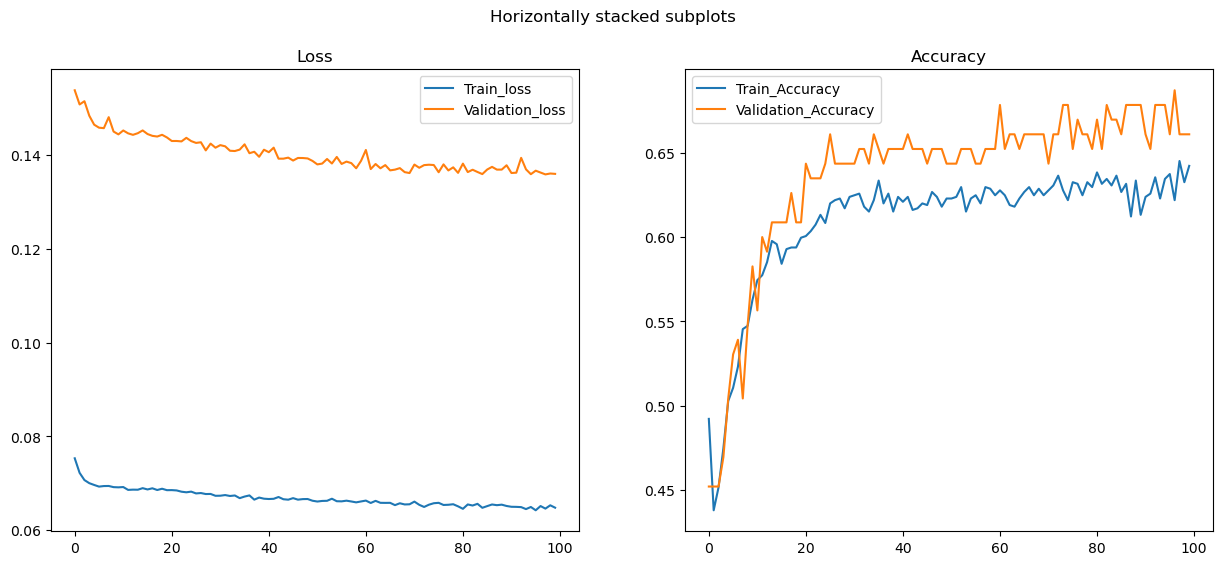

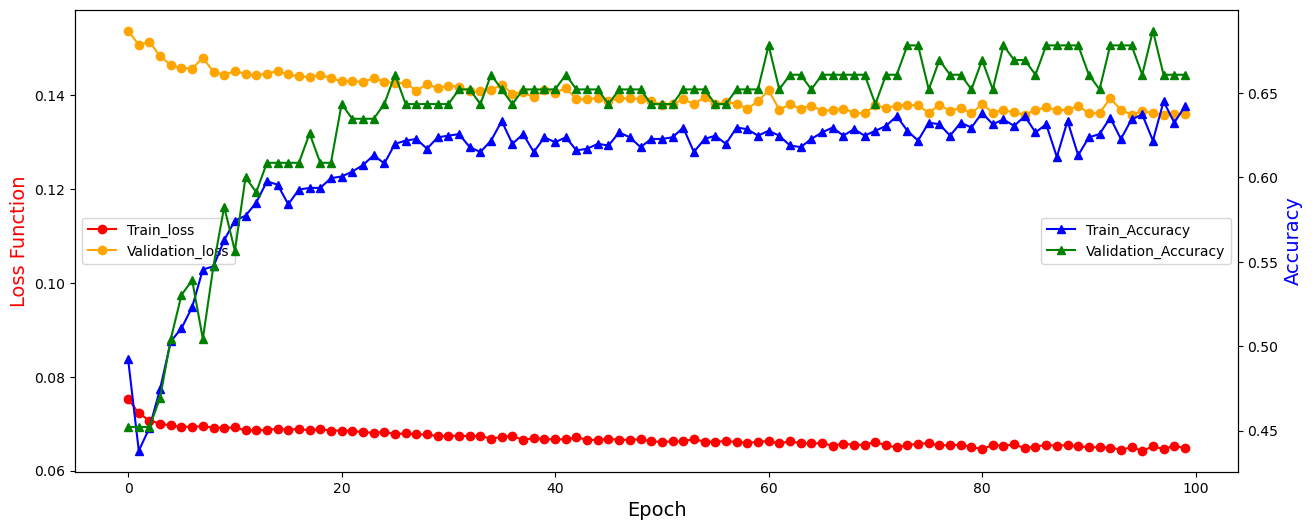

Current time: 82.234 minutes. Time expected till completion: 328.934 minutes

Epoch 101 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06504284407460713
Val loss:  0.13704665018164594
train accuracy:  0.6344294003868471
Val accuracy:  0.6695652173913044
Current time: 83.012 minutes. Time expected till completion: 327.937 minutes

Epoch 102 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06503187803050767
Val loss:  0.13613906062167624
train accuracy:  0.6382978723404256
Val accuracy:  0.6695652173913044
Current time: 83.787 minutes. Time expected till completion: 326.934 minutes

Epoch 103 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.06492491518966925
Val loss:  0.13490529630495154
train accuracy:  0.6411992263056093
Val accuracy:  0.6782608695652174
Current time: 84.563 minutes. Time expected till completion: 325.936 minutes

Epoch 104 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06501237168994586
Val loss:  0.13523321721864784
train accuracy:  0.6392649903288201
Val accuracy:  0.6869565217391305
Current time: 85.339 minutes. Time expected till completion: 324.946 minutes

Epoch 105 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06453337083702161
Val loss:  0.13664438309876814
train accuracy:  0.6411992263056093
Val accuracy:  0.6695652173913044
Current time: 86.115 minutes. Time expected till completion: 323.958 minutes

Epoch 106 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.06472887326485875
Val loss:  0.13528500225232995
train accuracy:  0.6363636363636364
Val accuracy:  0.6695652173913044
Current time: 86.891 minutes. Time expected till completion: 322.974 minutes

Epoch 107 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06480042183883417
Val loss:  0.13516766040221503
train accuracy:  0.6450676982591876
Val accuracy:  0.6521739130434783
Current time: 87.667 minutes. Time expected till completion: 321.993 minutes

Epoch 108 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06433744212644935
Val loss:  0.13512437913728798
train accuracy:  0.6441005802707931
Val accuracy:  0.6695652173913044
Current time: 88.444 minutes. Time expected till completion: 321.020 minutes

Epoch 109 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06451904525839844
Val loss:  0.13687891027201776
train accuracy:  0.6373307543520309
Val accuracy:  0.6608695652173913
Current time: 89.226 minutes. Time expected till completion: 320.068 minutes

Epoch 110 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06433034346689338
Val loss:  0.13639959822530331
train accuracy:  0.6460348162475822
Val accuracy:  0.6608695652173913
Current time: 90.001 minutes. Time expected till completion: 319.093 minutes

Epoch 111 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.0646329766546504
Val loss:  0.1361884153407553
train accuracy:  0.6460348162475822
Val accuracy:  0.6608695652173913
Current time: 90.777 minutes. Time expected till completion: 318.128 minutes

Epoch 112 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06406826028740845
Val loss:  0.13550831286803536
train accuracy:  0.6518375241779497
Val accuracy:  0.6695652173913044
Current time: 91.555 minutes. Time expected till completion: 317.173 minutes

Epoch 113 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06490375807714185
Val loss:  0.1359926348147185
train accuracy:  0.6363636363636364
Val accuracy:  0.6695652173913044
Current time: 92.333 minutes. Time expected till completion: 316.219 minutes

Epoch 114 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06458324107487382
Val loss:  0.13618119540421858
train accuracy:  0.6479690522243714
Val accuracy:  0.6521739130434783
Current time: 93.108 minutes. Time expected till completion: 315.261 minutes

Epoch 115 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06422134882246272
Val loss:  0.13643639035846877
train accuracy:  0.6441005802707931
Val accuracy:  0.6521739130434783
Current time: 93.886 minutes. Time expected till completion: 314.313 minutes

Epoch 116 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.06374067615724854
Val loss:  0.1370484937792239
train accuracy:  0.6470019342359767
Val accuracy:  0.6782608695652174
Current time: 94.664 minutes. Time expected till completion: 313.370 minutes

Epoch 117 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06461703172043629
Val loss:  0.13615968486537103
train accuracy:  0.6508704061895552
Val accuracy:  0.6695652173913044
Current time: 95.441 minutes. Time expected till completion: 312.426 minutes

Epoch 118 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.06395515102021238
Val loss:  0.13695351507352746
train accuracy:  0.6615087040618955
Val accuracy:  0.6695652173913044
Current time: 96.219 minutes. Time expected till completion: 311.489 minutes

Epoch 119 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06424116517635102
Val loss:  0.13551402402960736
train accuracy:  0.6470019342359767
Val accuracy:  0.6608695652173913
Current time: 96.998 minutes. Time expected till completion: 310.557 minutes

Epoch 120 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06443874667645423
Val loss:  0.13671043903931326
train accuracy:  0.6392649903288201
Val accuracy:  0.6782608695652174
Current time: 97.780 minutes. Time expected till completion: 309.635 minutes

Epoch 121 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06415826341630873
Val loss:  0.13455493087353915
train accuracy:  0.6411992263056093
Val accuracy:  0.6782608695652174
Current time: 98.560 minutes. Time expected till completion: 308.712 minutes

Epoch 122 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.0644402871164178
Val loss:  0.1366379976272583
train accuracy:  0.6334622823984526
Val accuracy:  0.6695652173913044
Current time: 99.338 minutes. Time expected till completion: 307.785 minutes

Epoch 123 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06451797796633073
Val loss:  0.1351510447004567
train accuracy:  0.6402321083172147
Val accuracy:  0.6695652173913044
Current time: 100.115 minutes. Time expected till completion: 306.857 minutes

Epoch 124 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06390089021430025
Val loss:  0.13528055522752844
train accuracy:  0.6586073500967118
Val accuracy:  0.6695652173913044
Current time: 100.893 minutes. Time expected till completion: 305.933 minutes

Epoch 125 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06418159949940916
Val loss:  0.13439316179441368
train accuracy:  0.6508704061895552
Val accuracy:  0.6782608695652174
Current time: 101.671 minutes. Time expected till completion: 305.013 minutes

Epoch 126 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06459617061356741
Val loss:  0.13590283134709233
train accuracy:  0.6450676982591876
Val accuracy:  0.6521739130434783
Current time: 102.458 minutes. Time expected till completion: 304.120 minutes

Epoch 127 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.06438179639829196
Val loss:  0.13497032030769016
train accuracy:  0.6402321083172147
Val accuracy:  0.6782608695652174
Current time: 103.235 minutes. Time expected till completion: 303.201 minutes

Epoch 128 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.06395223264076262
Val loss:  0.13673548076463782
train accuracy:  0.6576402321083172
Val accuracy:  0.6608695652173913
Current time: 104.010 minutes. Time expected till completion: 302.281 minutes

Epoch 129 of 500


100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


train loss:  0.06383901402152484
Val loss:  0.13605506471965623
train accuracy:  0.6499032882011605
Val accuracy:  0.6608695652173913
Current time: 104.785 minutes. Time expected till completion: 301.358 minutes

Epoch 130 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06383815730563445
Val loss:  0.13491909866747648
train accuracy:  0.648936170212766
Val accuracy:  0.6782608695652174
Current time: 105.559 minutes. Time expected till completion: 300.437 minutes

Epoch 131 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06401999355284803
Val loss:  0.13433595999427464
train accuracy:  0.6411992263056093
Val accuracy:  0.6695652173913044
Current time: 106.333 minutes. Time expected till completion: 299.517 minutes

Epoch 132 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06411133968853167
Val loss:  0.13611813990966135
train accuracy:  0.6441005802707931
Val accuracy:  0.6782608695652174
Current time: 107.108 minutes. Time expected till completion: 298.604 minutes

Epoch 133 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.06396733106220252
Val loss:  0.134039873143901
train accuracy:  0.6508704061895552
Val accuracy:  0.6782608695652174
Current time: 107.880 minutes. Time expected till completion: 297.685 minutes

Epoch 134 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06407884132239527
Val loss:  0.13697795142298158
train accuracy:  0.6566731141199227
Val accuracy:  0.6521739130434783
Current time: 108.656 minutes. Time expected till completion: 296.777 minutes

Epoch 135 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06372772736521708
Val loss:  0.1366711922313856
train accuracy:  0.6441005802707931
Val accuracy:  0.6695652173913044
Current time: 109.434 minutes. Time expected till completion: 295.877 minutes

Epoch 136 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06375436360877533
Val loss:  0.13651764703833538
train accuracy:  0.6586073500967118
Val accuracy:  0.6695652173913044
Current time: 110.212 minutes. Time expected till completion: 294.980 minutes

Epoch 137 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.06422022008111906
Val loss:  0.13580105874849402
train accuracy:  0.6460348162475822
Val accuracy:  0.6608695652173913
Current time: 110.999 minutes. Time expected till completion: 294.106 minutes

Epoch 138 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06330127209943776
Val loss:  0.1369197093922159
train accuracy:  0.6634429400386848
Val accuracy:  0.6521739130434783
Current time: 111.790 minutes. Time expected till completion: 293.247 minutes

Epoch 139 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06414221460630169
Val loss:  0.13627990069596663
train accuracy:  0.6537717601547389
Val accuracy:  0.6434782608695652
Current time: 112.572 minutes. Time expected till completion: 292.364 minutes

Epoch 140 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.06362762528415805
Val loss:  0.13774530265642249
train accuracy:  0.6644100580270793
Val accuracy:  0.6695652173913044
Current time: 113.356 minutes. Time expected till completion: 291.486 minutes

Epoch 141 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06366309904037638
Val loss:  0.13500967595888222
train accuracy:  0.6711798839458414
Val accuracy:  0.6782608695652174
Current time: 114.141 minutes. Time expected till completion: 290.614 minutes

Epoch 142 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.06317533774578825
Val loss:  0.13604107214056926
train accuracy:  0.6595744680851063
Val accuracy:  0.6782608695652174
Current time: 114.919 minutes. Time expected till completion: 289.726 minutes

Epoch 143 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.063518876263897
Val loss:  0.1372993940892427
train accuracy:  0.6518375241779497
Val accuracy:  0.6521739130434783
Current time: 115.698 minutes. Time expected till completion: 288.840 minutes

Epoch 144 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06403626406446417
Val loss:  0.1357828860697539
train accuracy:  0.6518375241779497
Val accuracy:  0.6782608695652174
Current time: 116.480 minutes. Time expected till completion: 287.965 minutes

Epoch 145 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06339526412796005
Val loss:  0.13556186582731164
train accuracy:  0.6595744680851063
Val accuracy:  0.6869565217391305
Current time: 117.256 minutes. Time expected till completion: 287.075 minutes

Epoch 146 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06391177480640449
Val loss:  0.13704059227653173
train accuracy:  0.6479690522243714
Val accuracy:  0.6608695652173913
Current time: 118.042 minutes. Time expected till completion: 286.210 minutes

Epoch 147 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06323808904312105
Val loss:  0.13673526670621788
train accuracy:  0.660541586073501
Val accuracy:  0.6521739130434783
Current time: 118.827 minutes. Time expected till completion: 285.346 minutes

Epoch 148 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06400260577118835
Val loss:  0.13661304556805154
train accuracy:  0.6479690522243714
Val accuracy:  0.6695652173913044
Current time: 119.605 minutes. Time expected till completion: 284.466 minutes

Epoch 149 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.06382588289923087
Val loss:  0.13526233745657879
train accuracy:  0.660541586073501
Val accuracy:  0.6782608695652174
Current time: 120.386 minutes. Time expected till completion: 283.594 minutes

Epoch 150 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06368161331523549
Val loss:  0.1363814670106639
train accuracy:  0.660541586073501
Val accuracy:  0.6695652173913044
Current time: 121.167 minutes. Time expected till completion: 282.722 minutes

Epoch 151 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06357222881953536
Val loss:  0.13560101363969887
train accuracy:  0.6711798839458414
Val accuracy:  0.6608695652173913
Current time: 121.946 minutes. Time expected till completion: 281.848 minutes

Epoch 152 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06354586638841685
Val loss:  0.13507571064907573
train accuracy:  0.6721470019342359
Val accuracy:  0.6521739130434783
Current time: 122.723 minutes. Time expected till completion: 280.970 minutes

Epoch 153 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.06386667691762028
Val loss:  0.13674855491389398
train accuracy:  0.6595744680851063
Val accuracy:  0.6608695652173913
Current time: 123.513 minutes. Time expected till completion: 280.125 minutes

Epoch 154 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.0631338839835309
Val loss:  0.13566687573557315
train accuracy:  0.6595744680851063
Val accuracy:  0.6521739130434783
Current time: 124.289 minutes. Time expected till completion: 279.247 minutes

Epoch 155 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.0637106001953553
Val loss:  0.13635654864103897
train accuracy:  0.6644100580270793
Val accuracy:  0.6608695652173913
Current time: 125.067 minutes. Time expected till completion: 278.374 minutes

Epoch 156 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.06302583817125981
Val loss:  0.1351690852123758
train accuracy:  0.6663442940038685
Val accuracy:  0.6695652173913044
Current time: 125.845 minutes. Time expected till completion: 277.504 minutes

Epoch 157 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06353318581728687
Val loss:  0.13690670417702716
train accuracy:  0.6537717601547389
Val accuracy:  0.6608695652173913
Current time: 126.639 minutes. Time expected till completion: 276.671 minutes

Epoch 158 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.06325308941088516
Val loss:  0.1358307403066884
train accuracy:  0.655705996131528
Val accuracy:  0.6608695652173913
Current time: 127.427 minutes. Time expected till completion: 275.823 minutes

Epoch 159 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.06343200675984646
Val loss:  0.1367035036501677
train accuracy:  0.6586073500967118
Val accuracy:  0.6521739130434783
Current time: 128.212 minutes. Time expected till completion: 274.971 minutes

Epoch 160 of 500


100%|██████████| 15/15 [00:02<00:00,  5.93it/s]


train loss:  0.06343619153624117
Val loss:  0.13565299562785937
train accuracy:  0.6595744680851063
Val accuracy:  0.6695652173913044
Current time: 129.021 minutes. Time expected till completion: 274.170 minutes

Epoch 161 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06332900261279462
Val loss:  0.13766166697377744
train accuracy:  0.6673114119922631
Val accuracy:  0.6521739130434783
Current time: 129.813 minutes. Time expected till completion: 273.333 minutes

Epoch 162 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06334420721581642
Val loss:  0.1363544655882794
train accuracy:  0.648936170212766
Val accuracy:  0.6695652173913044
Current time: 130.600 minutes. Time expected till completion: 272.487 minutes

Epoch 163 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.0635876349485128
Val loss:  0.1366565502208212
train accuracy:  0.6537717601547389
Val accuracy:  0.6608695652173913
Current time: 131.385 minutes. Time expected till completion: 271.637 minutes

Epoch 164 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06288970525536823
Val loss:  0.13613725486009018
train accuracy:  0.6673114119922631
Val accuracy:  0.6521739130434783
Current time: 132.180 minutes. Time expected till completion: 270.808 minutes

Epoch 165 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06314003040988855
Val loss:  0.13479298923326574
train accuracy:  0.6653771760154739
Val accuracy:  0.6695652173913044
Current time: 132.959 minutes. Time expected till completion: 269.946 minutes

Epoch 166 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.06368086647018935
Val loss:  0.13627738071524578
train accuracy:  0.6624758220502901
Val accuracy:  0.6608695652173913
Current time: 133.742 minutes. Time expected till completion: 269.095 minutes

Epoch 167 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.06312647859639771
Val loss:  0.13556671246238378
train accuracy:  0.6673114119922631
Val accuracy:  0.6695652173913044
Current time: 134.543 minutes. Time expected till completion: 268.280 minutes

Epoch 168 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06299681099747781
Val loss:  0.13447314293488213
train accuracy:  0.6692456479690522
Val accuracy:  0.6695652173913044
Current time: 135.325 minutes. Time expected till completion: 267.427 minutes

Epoch 169 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06260507393851732
Val loss:  0.13710888157720152
train accuracy:  0.6663442940038685
Val accuracy:  0.6695652173913044
Current time: 136.101 minutes. Time expected till completion: 266.565 minutes

Epoch 170 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.06307612281703395
Val loss:  0.1368363681046859
train accuracy:  0.6595744680851063
Val accuracy:  0.6608695652173913
Current time: 136.883 minutes. Time expected till completion: 265.713 minutes

Epoch 171 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06338281413572669
Val loss:  0.13700033840925796
train accuracy:  0.6595744680851063
Val accuracy:  0.6695652173913044
Current time: 137.662 minutes. Time expected till completion: 264.859 minutes

Epoch 172 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.06324812896708225
Val loss:  0.13667077914528225
train accuracy:  0.6624758220502901
Val accuracy:  0.6695652173913044
Current time: 138.449 minutes. Time expected till completion: 264.020 minutes

Epoch 173 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06306959068982698
Val loss:  0.13707147473874298
train accuracy:  0.6711798839458414
Val accuracy:  0.6521739130434783
Current time: 139.228 minutes. Time expected till completion: 263.166 minutes

Epoch 174 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.0635615665631322
Val loss:  0.1360443617986596
train accuracy:  0.6682785299806576
Val accuracy:  0.6608695652173913
Current time: 140.005 minutes. Time expected till completion: 262.309 minutes

Epoch 175 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.0628534477614803
Val loss:  0.13676475027333135
train accuracy:  0.6711798839458414
Val accuracy:  0.6695652173913044
Current time: 140.780 minutes. Time expected till completion: 261.448 minutes

Epoch 176 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.06330493127123761
Val loss:  0.13889991511469302
train accuracy:  0.6673114119922631
Val accuracy:  0.6521739130434783
Current time: 141.556 minutes. Time expected till completion: 260.592 minutes

Epoch 177 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.0631296875052572
Val loss:  0.13634814905083698
train accuracy:  0.660541586073501
Val accuracy:  0.6695652173913044
Current time: 142.334 minutes. Time expected till completion: 259.739 minutes

Epoch 178 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.0629349622435911
Val loss:  0.13785033122352933
train accuracy:  0.6702127659574468
Val accuracy:  0.6434782608695652
Current time: 143.114 minutes. Time expected till completion: 258.891 minutes

Epoch 179 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.06279473822398159
Val loss:  0.13614373569903165
train accuracy:  0.6818181818181818
Val accuracy:  0.6434782608695652
Current time: 143.900 minutes. Time expected till completion: 258.056 minutes

Epoch 180 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06273375068227373
Val loss:  0.13650041144827138
train accuracy:  0.6663442940038685
Val accuracy:  0.6260869565217392
Current time: 144.682 minutes. Time expected till completion: 257.212 minutes

Epoch 181 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06292054506750125
Val loss:  0.1366818262183148
train accuracy:  0.6779497098646035
Val accuracy:  0.6521739130434783
Current time: 145.464 minutes. Time expected till completion: 256.371 minutes

Epoch 182 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06249607600833738
Val loss:  0.13796843756800112
train accuracy:  0.6866537717601547
Val accuracy:  0.6434782608695652
Current time: 146.250 minutes. Time expected till completion: 255.536 minutes

Epoch 183 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.062448150645833415
Val loss:  0.1373395702113276
train accuracy:  0.6702127659574468
Val accuracy:  0.6608695652173913
Current time: 147.037 minutes. Time expected till completion: 254.703 minutes

Epoch 184 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.06320607587262786
Val loss:  0.13752580777458523
train accuracy:  0.6692456479690522
Val accuracy:  0.6608695652173913
Current time: 147.815 minutes. Time expected till completion: 253.856 minutes

Epoch 185 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.06282924377941301
Val loss:  0.1368364199348118
train accuracy:  0.6711798839458414
Val accuracy:  0.6521739130434783
Current time: 148.595 minutes. Time expected till completion: 253.013 minutes

Epoch 186 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06310464444658512
Val loss:  0.1368460961010145
train accuracy:  0.6721470019342359
Val accuracy:  0.6434782608695652
Current time: 149.372 minutes. Time expected till completion: 252.165 minutes

Epoch 187 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06309984834789077
Val loss:  0.13532740914303323
train accuracy:  0.6702127659574468
Val accuracy:  0.6434782608695652
Current time: 150.153 minutes. Time expected till completion: 251.326 minutes

Epoch 188 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.062310512280325824
Val loss:  0.13745687474375184
train accuracy:  0.6750483558994197
Val accuracy:  0.6434782608695652
Current time: 150.931 minutes. Time expected till completion: 250.481 minutes

Epoch 189 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.06255477597681189
Val loss:  0.1359898971474689
train accuracy:  0.6876208897485493
Val accuracy:  0.6608695652173913
Current time: 151.709 minutes. Time expected till completion: 249.637 minutes

Epoch 190 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.062395274466195465
Val loss:  0.134749116068301
train accuracy:  0.6740812379110251
Val accuracy:  0.6434782608695652
Current time: 152.488 minutes. Time expected till completion: 248.796 minutes

Epoch 191 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06228377383267165
Val loss:  0.13455863931904669
train accuracy:  0.6779497098646035
Val accuracy:  0.6608695652173913
Current time: 153.265 minutes. Time expected till completion: 247.953 minutes

Epoch 192 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.062098174595510015
Val loss:  0.13851362570472386
train accuracy:  0.6924564796905223
Val accuracy:  0.6434782608695652
Current time: 154.048 minutes. Time expected till completion: 247.119 minutes

Epoch 193 of 500


100%|██████████| 15/15 [00:02<00:00,  6.31it/s]


train loss:  0.06226364319974726
Val loss:  0.13561673682668934
train accuracy:  0.6653771760154739
Val accuracy:  0.6347826086956522
Current time: 154.826 minutes. Time expected till completion: 246.278 minutes

Epoch 194 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.06273445181505362
Val loss:  0.1355188680731732
train accuracy:  0.660541586073501
Val accuracy:  0.6434782608695652
Current time: 155.601 minutes. Time expected till completion: 245.433 minutes

Epoch 195 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06246170026882474
Val loss:  0.13533066770304805
train accuracy:  0.6789168278529981
Val accuracy:  0.6521739130434783
Current time: 156.420 minutes. Time expected till completion: 244.657 minutes

Epoch 196 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06253624688725869
Val loss:  0.1347188218780186
train accuracy:  0.6818181818181818
Val accuracy:  0.6434782608695652
Current time: 157.212 minutes. Time expected till completion: 243.840 minutes

Epoch 197 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.0625848721143586
Val loss:  0.1363185571587604
train accuracy:  0.6692456479690522
Val accuracy:  0.6347826086956522
Current time: 158.011 minutes. Time expected till completion: 243.032 minutes

Epoch 198 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06240444989222853
Val loss:  0.13641575574874878
train accuracy:  0.6992263056092843
Val accuracy:  0.6434782608695652
Current time: 158.806 minutes. Time expected till completion: 242.220 minutes

Epoch 199 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06238932166846624
Val loss:  0.13611031407895297
train accuracy:  0.6789168278529981
Val accuracy:  0.6347826086956522
Current time: 159.602 minutes. Time expected till completion: 241.409 minutes

Epoch 200 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.062394190572447196
Val loss:  0.13695695037427155
train accuracy:  0.6914893617021277
Val accuracy:  0.6260869565217392
Saving model checkpoint


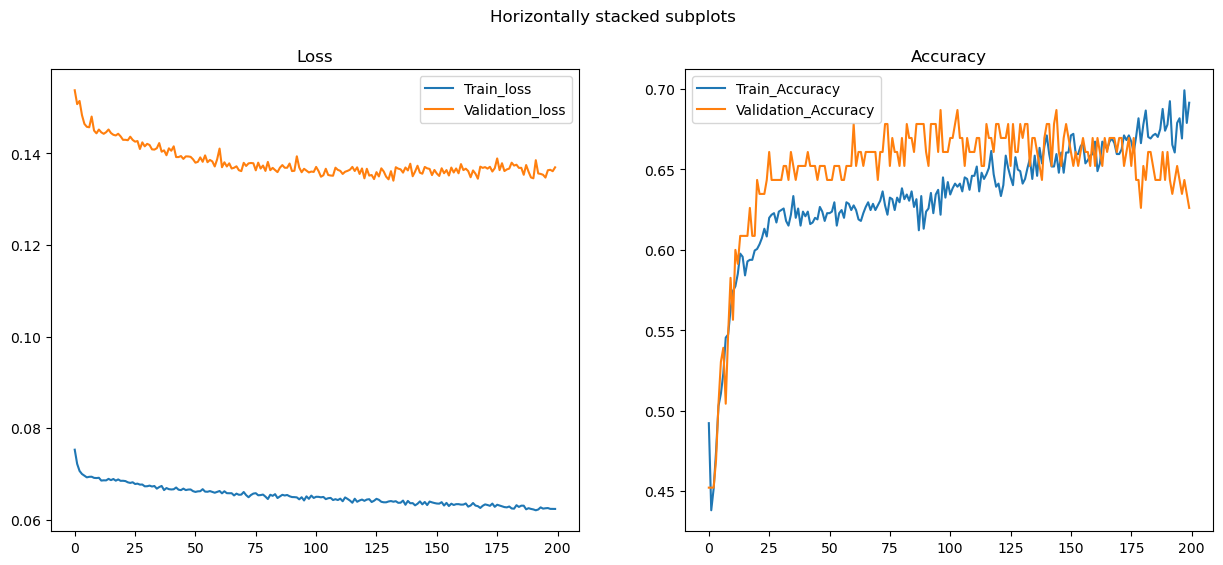

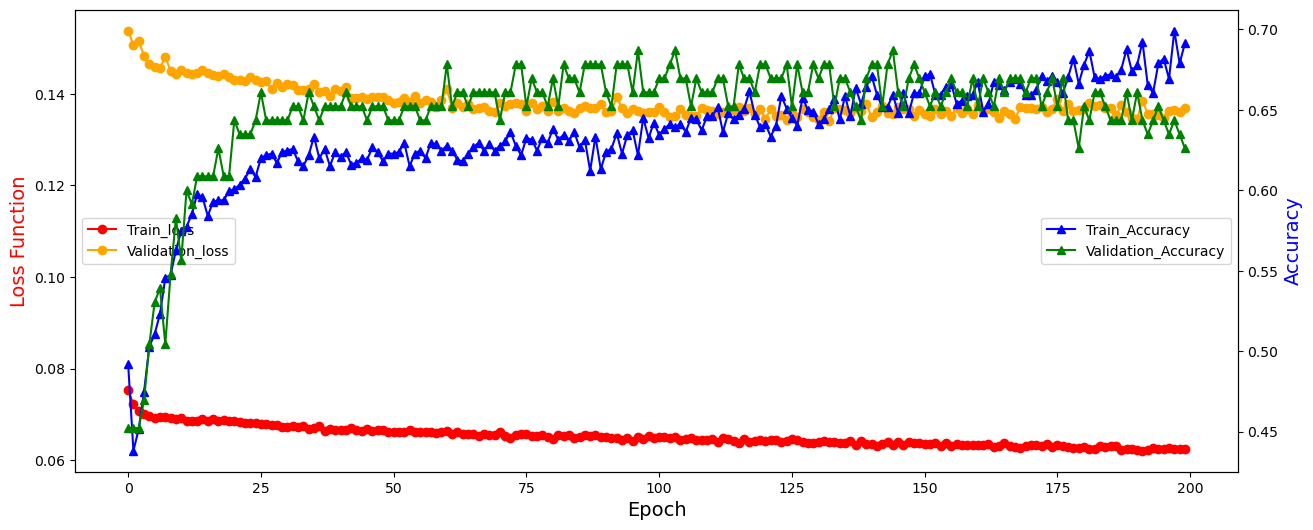

Current time: 160.406 minutes. Time expected till completion: 240.609 minutes

Epoch 201 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.06246705615543535
Val loss:  0.13650291225184566
train accuracy:  0.6721470019342359
Val accuracy:  0.6608695652173913
Current time: 161.197 minutes. Time expected till completion: 239.790 minutes

Epoch 202 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.0621920059681861
Val loss:  0.13444522256436556
train accuracy:  0.6818181818181818
Val accuracy:  0.6608695652173913
Current time: 161.988 minutes. Time expected till completion: 238.972 minutes

Epoch 203 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.062204098044327194
Val loss:  0.13632282277812127
train accuracy:  0.6798839458413927
Val accuracy:  0.6173913043478261
Current time: 162.792 minutes. Time expected till completion: 238.173 minutes

Epoch 204 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.0621190977857468
Val loss:  0.13522645597872526
train accuracy:  0.6779497098646035
Val accuracy:  0.6434782608695652
Current time: 163.580 minutes. Time expected till completion: 237.351 minutes

Epoch 205 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06208888474469951
Val loss:  0.13472125322922415
train accuracy:  0.6934235976789168
Val accuracy:  0.6173913043478261
Current time: 164.365 minutes. Time expected till completion: 236.525 minutes

Epoch 206 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.062147915248022316
Val loss:  0.13518648406733638
train accuracy:  0.688588007736944
Val accuracy:  0.6434782608695652
Current time: 165.165 minutes. Time expected till completion: 235.721 minutes

Epoch 207 of 500


100%|██████████| 15/15 [00:02<00:00,  5.84it/s]


train loss:  0.061806924223208104
Val loss:  0.13709720373153686
train accuracy:  0.6779497098646035
Val accuracy:  0.6347826086956522
Current time: 165.960 minutes. Time expected till completion: 234.909 minutes

Epoch 208 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.062400043183645844
Val loss:  0.13536370681679766
train accuracy:  0.6924564796905223
Val accuracy:  0.6347826086956522
Current time: 166.751 minutes. Time expected till completion: 234.093 minutes

Epoch 209 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06186699331152601
Val loss:  0.13587975450184034
train accuracy:  0.690522243713733
Val accuracy:  0.6782608695652174
Current time: 167.548 minutes. Time expected till completion: 233.285 minutes

Epoch 210 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.06193457904129471
Val loss:  0.1355912078981814
train accuracy:  0.6982591876208898
Val accuracy:  0.6695652173913044
Current time: 168.347 minutes. Time expected till completion: 232.480 minutes

Epoch 211 of 500


100%|██████████| 15/15 [00:02<00:00,  5.92it/s]


train loss:  0.0626319415103536
Val loss:  0.1348526234212129
train accuracy:  0.6808510638297872
Val accuracy:  0.6695652173913044
Current time: 169.145 minutes. Time expected till completion: 231.673 minutes

Epoch 212 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06204907408765944
Val loss:  0.1357221043628195
train accuracy:  0.6827852998065764
Val accuracy:  0.6434782608695652
Current time: 169.939 minutes. Time expected till completion: 230.861 minutes

Epoch 213 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06185804079764125
Val loss:  0.1357304661170296
train accuracy:  0.6808510638297872
Val accuracy:  0.6521739130434783
Current time: 170.739 minutes. Time expected till completion: 230.057 minutes

Epoch 214 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.06222390863374308
Val loss:  0.13515961118366407
train accuracy:  0.695357833655706
Val accuracy:  0.6608695652173913
Current time: 171.520 minutes. Time expected till completion: 229.228 minutes

Epoch 215 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06177256629591523
Val loss:  0.1360598123591879
train accuracy:  0.6769825918762089
Val accuracy:  0.6434782608695652
Current time: 172.309 minutes. Time expected till completion: 228.410 minutes

Epoch 216 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06131255401864043
Val loss:  0.1353623224341351
train accuracy:  0.7147001934235977
Val accuracy:  0.6434782608695652
Current time: 173.101 minutes. Time expected till completion: 227.596 minutes

Epoch 217 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.06215352701956345
Val loss:  0.1362057167550792
train accuracy:  0.6914893617021277
Val accuracy:  0.6608695652173913
Current time: 173.887 minutes. Time expected till completion: 226.775 minutes

Epoch 218 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.061660767178009744
Val loss:  0.1371786532194718
train accuracy:  0.7030947775628626
Val accuracy:  0.6347826086956522
Current time: 174.679 minutes. Time expected till completion: 225.962 minutes

Epoch 219 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.061686363971902046
Val loss:  0.13721889983052793
train accuracy:  0.6876208897485493
Val accuracy:  0.6347826086956522
Current time: 175.468 minutes. Time expected till completion: 225.144 minutes

Epoch 220 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.06133967003923781
Val loss:  0.13587102838184523
train accuracy:  0.6866537717601547
Val accuracy:  0.6260869565217392
Current time: 176.265 minutes. Time expected till completion: 224.337 minutes

Epoch 221 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.06148244005337905
Val loss:  0.13729385085727858
train accuracy:  0.7030947775628626
Val accuracy:  0.6521739130434783
Current time: 177.056 minutes. Time expected till completion: 223.523 minutes

Epoch 222 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.062053714430309125
Val loss:  0.13640741576319154
train accuracy:  0.683752417794971
Val accuracy:  0.6434782608695652
Current time: 177.839 minutes. Time expected till completion: 222.699 minutes

Epoch 223 of 500


100%|██████████| 15/15 [00:02<00:00,  5.92it/s]


train loss:  0.06156401460129242
Val loss:  0.13580314076465108
train accuracy:  0.6992263056092843
Val accuracy:  0.6173913043478261
Current time: 178.629 minutes. Time expected till completion: 221.884 minutes

Epoch 224 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.061471084158010135
Val loss:  0.13490838019744208
train accuracy:  0.6992263056092843
Val accuracy:  0.6260869565217392
Current time: 179.410 minutes. Time expected till completion: 221.059 minutes

Epoch 225 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.06198315596211579
Val loss:  0.13666065516679182
train accuracy:  0.6963249516441006
Val accuracy:  0.6260869565217392
Current time: 180.206 minutes. Time expected till completion: 220.251 minutes

Epoch 226 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.062228286692897865
Val loss:  0.13685599099034848
train accuracy:  0.6847195357833655
Val accuracy:  0.6434782608695652
Current time: 180.986 minutes. Time expected till completion: 219.425 minutes

Epoch 227 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06171698594462249
Val loss:  0.13846845730491306
train accuracy:  0.7040618955512572
Val accuracy:  0.6173913043478261
Current time: 181.777 minutes. Time expected till completion: 218.613 minutes

Epoch 228 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.061941484648669484
Val loss:  0.13735039907953014
train accuracy:  0.7001934235976789
Val accuracy:  0.6347826086956522
Current time: 182.559 minutes. Time expected till completion: 217.790 minutes

Epoch 229 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.06195220956488781
Val loss:  0.13588512773099154
train accuracy:  0.7011605415860735
Val accuracy:  0.6260869565217392
Current time: 183.346 minutes. Time expected till completion: 216.973 minutes

Epoch 230 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.0612732229080606
Val loss:  0.13663417308226875
train accuracy:  0.7059961315280464
Val accuracy:  0.6521739130434783
Current time: 184.126 minutes. Time expected till completion: 216.148 minutes

Epoch 231 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06192323865235659
Val loss:  0.13723943388980367
train accuracy:  0.6856866537717602
Val accuracy:  0.6434782608695652
Current time: 184.918 minutes. Time expected till completion: 215.337 minutes

Epoch 232 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.06118655838864915
Val loss:  0.13658579795256906
train accuracy:  0.7040618955512572
Val accuracy:  0.6347826086956522
Current time: 185.709 minutes. Time expected till completion: 214.525 minutes

Epoch 233 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.0612599046133473
Val loss:  0.1366640707720881
train accuracy:  0.7021276595744681
Val accuracy:  0.6434782608695652
Current time: 186.501 minutes. Time expected till completion: 213.715 minutes

Epoch 234 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06167834426494355
Val loss:  0.13499080046363499
train accuracy:  0.7098646034816247
Val accuracy:  0.6434782608695652
Current time: 187.298 minutes. Time expected till completion: 212.911 minutes

Epoch 235 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.061219236491035445
Val loss:  0.13603717140529467
train accuracy:  0.706963249516441
Val accuracy:  0.6521739130434783
Current time: 188.087 minutes. Time expected till completion: 212.098 minutes

Epoch 236 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06124961883463758
Val loss:  0.13699025226675945
train accuracy:  0.706963249516441
Val accuracy:  0.6347826086956522
Current time: 188.870 minutes. Time expected till completion: 211.278 minutes

Epoch 237 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.061371068889905685
Val loss:  0.13701104703156844
train accuracy:  0.7079303675048356
Val accuracy:  0.6347826086956522
Current time: 189.666 minutes. Time expected till completion: 210.473 minutes

Epoch 238 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06184510555211995
Val loss:  0.13766995046449745
train accuracy:  0.6924564796905223
Val accuracy:  0.6434782608695652
Current time: 190.460 minutes. Time expected till completion: 209.666 minutes

Epoch 239 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06107622177504018
Val loss:  0.13532345035801763
train accuracy:  0.7147001934235977
Val accuracy:  0.6434782608695652
Current time: 191.247 minutes. Time expected till completion: 208.851 minutes

Epoch 240 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.061233256667910047
Val loss:  0.13725883494252744
train accuracy:  0.7127659574468085
Val accuracy:  0.6521739130434783
Current time: 192.039 minutes. Time expected till completion: 208.042 minutes

Epoch 241 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06155829203659146
Val loss:  0.13748374762742416
train accuracy:  0.7079303675048356
Val accuracy:  0.6695652173913044
Current time: 192.832 minutes. Time expected till completion: 207.235 minutes

Epoch 242 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.06103178662764957
Val loss:  0.13672354584154875
train accuracy:  0.718568665377176
Val accuracy:  0.6521739130434783
Current time: 193.626 minutes. Time expected till completion: 206.428 minutes

Epoch 243 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.061813058140660626
Val loss:  0.13662175717561142
train accuracy:  0.6895551257253385
Val accuracy:  0.6956521739130435
Current time: 194.412 minutes. Time expected till completion: 205.613 minutes

Epoch 244 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.061143753030544555
Val loss:  0.1391453214313673
train accuracy:  0.7292069632495164
Val accuracy:  0.6608695652173913
Current time: 195.197 minutes. Time expected till completion: 204.797 minutes

Epoch 245 of 500


100%|██████████| 15/15 [00:02<00:00,  6.31it/s]


train loss:  0.06129081123571562
Val loss:  0.13712680806284366
train accuracy:  0.7108317214700194
Val accuracy:  0.6695652173913044
Current time: 196.007 minutes. Time expected till completion: 204.007 minutes

Epoch 246 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06117242966675897
Val loss:  0.13550612511842147
train accuracy:  0.7108317214700194
Val accuracy:  0.6521739130434783
Current time: 196.797 minutes. Time expected till completion: 203.197 minutes

Epoch 247 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06123500122784185
Val loss:  0.13728437942007313
train accuracy:  0.7030947775628626
Val accuracy:  0.6434782608695652
Current time: 197.590 minutes. Time expected till completion: 202.389 minutes

Epoch 248 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.060604060641570985
Val loss:  0.13780823479528012
train accuracy:  0.7098646034816247
Val accuracy:  0.6608695652173913
Current time: 198.384 minutes. Time expected till completion: 201.584 minutes

Epoch 249 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.060691905955512014
Val loss:  0.1359681927639505
train accuracy:  0.7176015473887815
Val accuracy:  0.6608695652173913
Current time: 199.172 minutes. Time expected till completion: 200.772 minutes

Epoch 250 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06087796202711256
Val loss:  0.13821265593818996
train accuracy:  0.7263056092843327
Val accuracy:  0.6347826086956522
Current time: 199.959 minutes. Time expected till completion: 199.959 minutes

Epoch 251 of 500


100%|██████████| 15/15 [00:02<00:00,  5.93it/s]


train loss:  0.06093066337030215
Val loss:  0.1366650166718856
train accuracy:  0.6972920696324951
Val accuracy:  0.6173913043478261
Current time: 200.754 minutes. Time expected till completion: 199.154 minutes

Epoch 252 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.061003811124215046
Val loss:  0.13888574320337047
train accuracy:  0.7108317214700194
Val accuracy:  0.6173913043478261
Current time: 201.550 minutes. Time expected till completion: 198.351 minutes

Epoch 253 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.060741945207695436
Val loss:  0.13840526135071465
train accuracy:  0.7176015473887815
Val accuracy:  0.6521739130434783
Current time: 202.348 minutes. Time expected till completion: 197.549 minutes

Epoch 254 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06039763632549308
Val loss:  0.13842687606811524
train accuracy:  0.7127659574468085
Val accuracy:  0.6260869565217392
Current time: 203.147 minutes. Time expected till completion: 196.748 minutes

Epoch 255 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06031856788196232
Val loss:  0.13629546787427818
train accuracy:  0.730174081237911
Val accuracy:  0.6521739130434783
Current time: 203.940 minutes. Time expected till completion: 195.942 minutes

Epoch 256 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.06019314466408189
Val loss:  0.13623696254647297
train accuracy:  0.7330754352030948
Val accuracy:  0.6608695652173913
Current time: 204.728 minutes. Time expected till completion: 195.131 minutes

Epoch 257 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.06065601000933398
Val loss:  0.13776594555896263
train accuracy:  0.730174081237911
Val accuracy:  0.6608695652173913
Current time: 205.529 minutes. Time expected till completion: 194.333 minutes

Epoch 258 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.0610857288311713
Val loss:  0.13635128684665845
train accuracy:  0.7388781431334622
Val accuracy:  0.6521739130434783
Current time: 206.325 minutes. Time expected till completion: 193.530 minutes

Epoch 259 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.06106468256944844
Val loss:  0.13791290728942207
train accuracy:  0.7137330754352031
Val accuracy:  0.6521739130434783
Current time: 207.122 minutes. Time expected till completion: 192.727 minutes

Epoch 260 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06012846762944928
Val loss:  0.1370564139407614
train accuracy:  0.7243713733075435
Val accuracy:  0.6608695652173913
Current time: 207.917 minutes. Time expected till completion: 191.924 minutes

Epoch 261 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.060466289693197846
Val loss:  0.1356018330739892
train accuracy:  0.7408123791102514
Val accuracy:  0.6869565217391305
Current time: 208.707 minutes. Time expected till completion: 191.115 minutes

Epoch 262 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.060314627115684964
Val loss:  0.136308245036913
train accuracy:  0.7369439071566731
Val accuracy:  0.6521739130434783
Current time: 209.486 minutes. Time expected till completion: 190.297 minutes

Epoch 263 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06077799471941861
Val loss:  0.1375389156134232
train accuracy:  0.7088974854932302
Val accuracy:  0.6347826086956522
Current time: 210.273 minutes. Time expected till completion: 189.486 minutes

Epoch 264 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.060763286610405955
Val loss:  0.13939832397129226
train accuracy:  0.7272727272727273
Val accuracy:  0.6521739130434783
Current time: 211.053 minutes. Time expected till completion: 188.668 minutes

Epoch 265 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.06089559491413935
Val loss:  0.13637958713199783
train accuracy:  0.7243713733075435
Val accuracy:  0.6434782608695652
Current time: 211.841 minutes. Time expected till completion: 187.859 minutes

Epoch 266 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.06013131256952046
Val loss:  0.1361784551454627
train accuracy:  0.7292069632495164
Val accuracy:  0.6608695652173913
Current time: 212.637 minutes. Time expected till completion: 187.056 minutes

Epoch 267 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06043741199218558
Val loss:  0.13807530351307082
train accuracy:  0.7243713733075435
Val accuracy:  0.6173913043478261
Current time: 213.424 minutes. Time expected till completion: 186.246 minutes

Epoch 268 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.06091983037022604
Val loss:  0.13561695399491683
train accuracy:  0.7214700193423598
Val accuracy:  0.6347826086956522
Current time: 214.216 minutes. Time expected till completion: 185.440 minutes

Epoch 269 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.06055124083847326
Val loss:  0.13729377259378847
train accuracy:  0.7253384912959381
Val accuracy:  0.6695652173913044
Current time: 215.008 minutes. Time expected till completion: 184.635 minutes

Epoch 270 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.060554218937857236
Val loss:  0.13744398977445518
train accuracy:  0.7321083172147002
Val accuracy:  0.6434782608695652
Current time: 215.791 minutes. Time expected till completion: 183.822 minutes

Epoch 271 of 500


100%|██████████| 15/15 [00:02<00:00,  6.31it/s]


train loss:  0.06027248196260611
Val loss:  0.13803031029908552
train accuracy:  0.7456479690522244
Val accuracy:  0.6695652173913044
Current time: 216.579 minutes. Time expected till completion: 183.013 minutes

Epoch 272 of 500


100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


train loss:  0.06003062314636703
Val loss:  0.1370929619540339
train accuracy:  0.7446808510638298
Val accuracy:  0.6434782608695652
Current time: 217.371 minutes. Time expected till completion: 182.208 minutes

Epoch 273 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06061844484487862
Val loss:  0.1382631073827329
train accuracy:  0.7224371373307543
Val accuracy:  0.6434782608695652
Current time: 218.154 minutes. Time expected till completion: 181.395 minutes

Epoch 274 of 500


100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


train loss:  0.06007361331345726
Val loss:  0.1359582418980806
train accuracy:  0.7176015473887815
Val accuracy:  0.6521739130434783
Current time: 218.942 minutes. Time expected till completion: 180.587 minutes

Epoch 275 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06043118440205631
Val loss:  0.13840253508609274
train accuracy:  0.723404255319149
Val accuracy:  0.6347826086956522
Current time: 219.727 minutes. Time expected till completion: 179.777 minutes

Epoch 276 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.06017421488605108
Val loss:  0.13766270513119905
train accuracy:  0.7292069632495164
Val accuracy:  0.6434782608695652
Current time: 220.520 minutes. Time expected till completion: 178.972 minutes

Epoch 277 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05983392251529362
Val loss:  0.13886051955430403
train accuracy:  0.7437137330754352
Val accuracy:  0.6434782608695652
Current time: 221.326 minutes. Time expected till completion: 178.179 minutes

Epoch 278 of 500


100%|██████████| 15/15 [00:02<00:00,  6.04it/s]


train loss:  0.06012835285880349
Val loss:  0.13863687826239546
train accuracy:  0.7427466150870407
Val accuracy:  0.6347826086956522
Current time: 222.119 minutes. Time expected till completion: 177.375 minutes

Epoch 279 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.05980232640437969
Val loss:  0.13901792142702185
train accuracy:  0.7514506769825918
Val accuracy:  0.6608695652173913
Current time: 222.911 minutes. Time expected till completion: 176.571 minutes

Epoch 280 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.060031542752651455
Val loss:  0.13795170628506204
train accuracy:  0.7379110251450677
Val accuracy:  0.6173913043478261
Current time: 223.707 minutes. Time expected till completion: 175.770 minutes

Epoch 281 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.059820676391774956
Val loss:  0.13693430423736572
train accuracy:  0.7369439071566731
Val accuracy:  0.6869565217391305
Current time: 224.501 minutes. Time expected till completion: 174.967 minutes

Epoch 282 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.05994773891032088
Val loss:  0.13454789493394934
train accuracy:  0.746615087040619
Val accuracy:  0.6608695652173913
Current time: 225.316 minutes. Time expected till completion: 174.181 minutes

Epoch 283 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.059884168596747306
Val loss:  0.14058905321618784
train accuracy:  0.7437137330754352
Val accuracy:  0.6347826086956522
Current time: 226.108 minutes. Time expected till completion: 173.376 minutes

Epoch 284 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.05947533336322128
Val loss:  0.13804434226906817
train accuracy:  0.7504835589941973
Val accuracy:  0.6608695652173913
Current time: 226.909 minutes. Time expected till completion: 172.579 minutes

Epoch 285 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.06014878716413472
Val loss:  0.1385333475859269
train accuracy:  0.7427466150870407
Val accuracy:  0.6608695652173913
Current time: 227.700 minutes. Time expected till completion: 171.774 minutes

Epoch 286 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.060442519948837606
Val loss:  0.13717792448790178
train accuracy:  0.7427466150870407
Val accuracy:  0.6347826086956522
Current time: 228.501 minutes. Time expected till completion: 170.977 minutes

Epoch 287 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06035230220862929
Val loss:  0.13743506980978926
train accuracy:  0.7379110251450677
Val accuracy:  0.6695652173913044
Current time: 229.309 minutes. Time expected till completion: 170.184 minutes

Epoch 288 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05940278707436021
Val loss:  0.13834027207416036
train accuracy:  0.753384912959381
Val accuracy:  0.6608695652173913
Current time: 230.113 minutes. Time expected till completion: 169.389 minutes

Epoch 289 of 500


100%|██████████| 15/15 [00:02<00:00,  6.04it/s]


train loss:  0.05934026041851745
Val loss:  0.13802945821181586
train accuracy:  0.769825918762089
Val accuracy:  0.6347826086956522
Current time: 230.909 minutes. Time expected till completion: 168.588 minutes

Epoch 290 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06014313999873296
Val loss:  0.13718848021134086
train accuracy:  0.7475822050290135
Val accuracy:  0.6434782608695652
Current time: 231.694 minutes. Time expected till completion: 167.779 minutes

Epoch 291 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.06012566557705287
Val loss:  0.13825390805368837
train accuracy:  0.7350096711798839
Val accuracy:  0.6434782608695652
Current time: 232.489 minutes. Time expected till completion: 166.977 minutes

Epoch 292 of 500


100%|██████████| 15/15 [00:02<00:00,  5.85it/s]


train loss:  0.059832138411081044
Val loss:  0.1381767179654992
train accuracy:  0.7504835589941973
Val accuracy:  0.6260869565217392
Current time: 233.282 minutes. Time expected till completion: 166.174 minutes

Epoch 293 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.05907973318542687
Val loss:  0.14068663845891538
train accuracy:  0.7669245647969052
Val accuracy:  0.6260869565217392
Current time: 234.078 minutes. Time expected till completion: 165.373 minutes

Epoch 294 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.05935264129472655
Val loss:  0.1391666459000629
train accuracy:  0.7591876208897486
Val accuracy:  0.6347826086956522
Current time: 234.882 minutes. Time expected till completion: 164.577 minutes

Epoch 295 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.059663761342286604
Val loss:  0.13810699297034223
train accuracy:  0.7504835589941973
Val accuracy:  0.6260869565217392
Current time: 235.673 minutes. Time expected till completion: 163.773 minutes

Epoch 296 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.05963623252781955
Val loss:  0.13470635154972907
train accuracy:  0.7611218568665378
Val accuracy:  0.6695652173913044
Current time: 236.471 minutes. Time expected till completion: 162.973 minutes

Epoch 297 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.05998593493863739
Val loss:  0.13752666608147
train accuracy:  0.753384912959381
Val accuracy:  0.6521739130434783
Current time: 237.265 minutes. Time expected till completion: 162.171 minutes

Epoch 298 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.058965232662813345
Val loss:  0.13897477284721707
train accuracy:  0.7611218568665378
Val accuracy:  0.6695652173913044
Current time: 238.056 minutes. Time expected till completion: 161.367 minutes

Epoch 299 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.059697298466352244
Val loss:  0.1402457014374111
train accuracy:  0.7514506769825918
Val accuracy:  0.6347826086956522
Current time: 238.851 minutes. Time expected till completion: 160.566 minutes

Epoch 300 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.058847790702860406
Val loss:  0.13646443926769755
train accuracy:  0.7620889748549323
Val accuracy:  0.6521739130434783
Saving model checkpoint


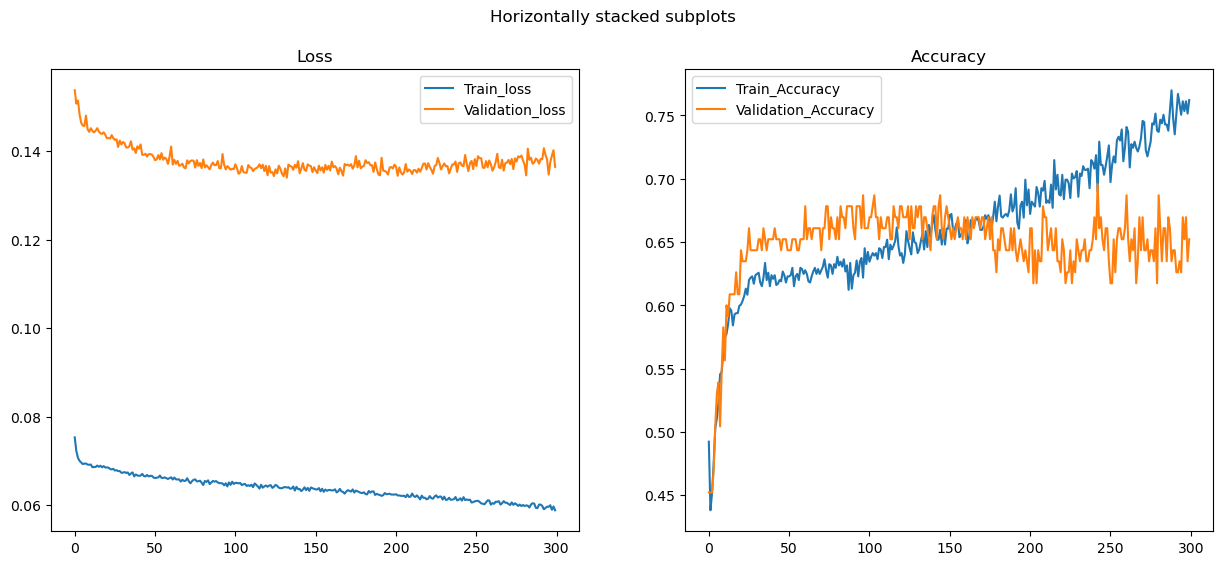

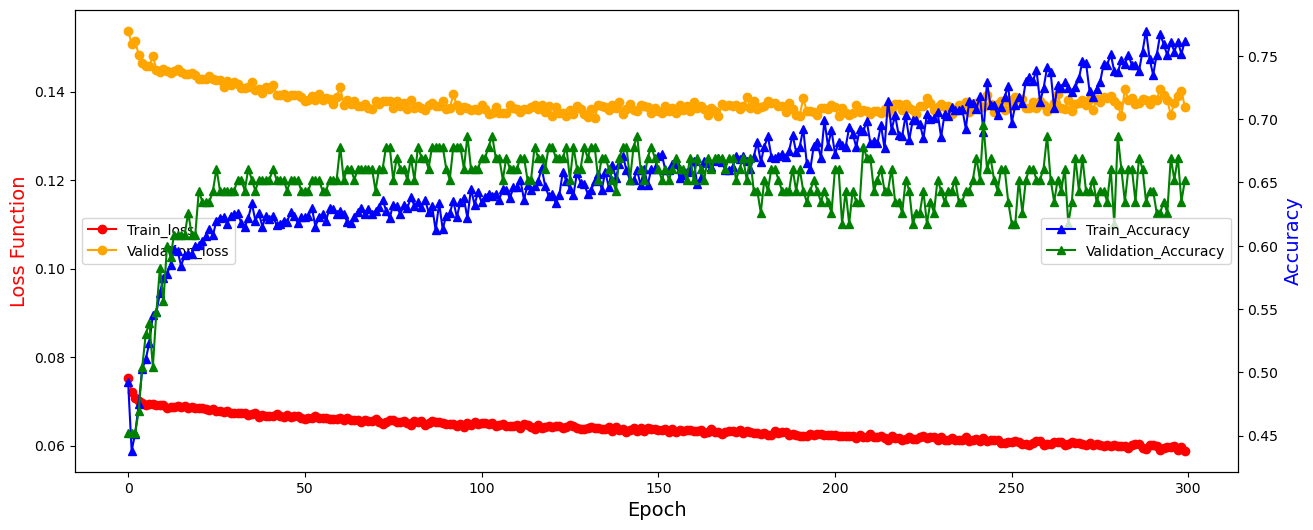

Current time: 239.672 minutes. Time expected till completion: 159.781 minutes

Epoch 301 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.059558391628689644
Val loss:  0.13527028145997422
train accuracy:  0.7514506769825918
Val accuracy:  0.6521739130434783
Current time: 240.471 minutes. Time expected till completion: 158.983 minutes

Epoch 302 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05970853642061554
Val loss:  0.13738996205122575
train accuracy:  0.7504835589941973
Val accuracy:  0.6086956521739131
Current time: 241.280 minutes. Time expected till completion: 158.190 minutes

Epoch 303 of 500


100%|██████████| 15/15 [00:02<00:00,  5.91it/s]


train loss:  0.0587340880408739
Val loss:  0.13673765192861143
train accuracy:  0.7833655705996132
Val accuracy:  0.6695652173913044
Current time: 242.089 minutes. Time expected till completion: 157.398 minutes

Epoch 304 of 500


100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


train loss:  0.05857931403173008
Val loss:  0.13906051594278088
train accuracy:  0.7823984526112185
Val accuracy:  0.6434782608695652
Current time: 242.887 minutes. Time expected till completion: 156.598 minutes

Epoch 305 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.060045991518050144
Val loss:  0.13828504189201024
train accuracy:  0.7553191489361702
Val accuracy:  0.6695652173913044
Current time: 243.688 minutes. Time expected till completion: 155.800 minutes

Epoch 306 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.05932015855031041
Val loss:  0.1364727072093798
train accuracy:  0.7591876208897486
Val accuracy:  0.6782608695652174
Current time: 244.485 minutes. Time expected till completion: 155.000 minutes

Epoch 307 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.059169209729772014
Val loss:  0.13938074474749357
train accuracy:  0.7591876208897486
Val accuracy:  0.6608695652173913
Current time: 245.293 minutes. Time expected till completion: 154.207 minutes

Epoch 308 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.05923833428545201
Val loss:  0.13868673210558685
train accuracy:  0.7669245647969052
Val accuracy:  0.6608695652173913
Current time: 246.097 minutes. Time expected till completion: 153.411 minutes

Epoch 309 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05892792401738047
Val loss:  0.13783669834551604
train accuracy:  0.7775628626692457
Val accuracy:  0.6173913043478261
Current time: 246.900 minutes. Time expected till completion: 152.614 minutes

Epoch 310 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05918471610292475
Val loss:  0.13742970435515695
train accuracy:  0.753384912959381
Val accuracy:  0.6434782608695652
Current time: 247.692 minutes. Time expected till completion: 151.811 minutes

Epoch 311 of 500


100%|██████████| 15/15 [00:02<00:00,  5.89it/s]


train loss:  0.05882231398292852
Val loss:  0.13814868305040442
train accuracy:  0.769825918762089
Val accuracy:  0.6434782608695652
Current time: 248.484 minutes. Time expected till completion: 151.008 minutes

Epoch 312 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.05832269292043763
Val loss:  0.13589025995005732
train accuracy:  0.7707930367504836
Val accuracy:  0.6434782608695652
Current time: 249.280 minutes. Time expected till completion: 150.207 minutes

Epoch 313 of 500


100%|██████████| 15/15 [00:02<00:00,  5.91it/s]


train loss:  0.0591272809173429
Val loss:  0.13837859164113583
train accuracy:  0.7649903288201161
Val accuracy:  0.6521739130434783
Current time: 250.078 minutes. Time expected till completion: 149.407 minutes

Epoch 314 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.0588560010985664
Val loss:  0.14093465494072954
train accuracy:  0.7785299806576402
Val accuracy:  0.6173913043478261
Current time: 250.883 minutes. Time expected till completion: 148.612 minutes

Epoch 315 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.05901314424822824
Val loss:  0.13846807635348776
train accuracy:  0.7669245647969052
Val accuracy:  0.6260869565217392
Current time: 251.679 minutes. Time expected till completion: 147.811 minutes

Epoch 316 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.05927502117489016
Val loss:  0.14131460811780847
train accuracy:  0.7649903288201161
Val accuracy:  0.5826086956521739
Current time: 252.469 minutes. Time expected till completion: 147.007 minutes

Epoch 317 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05871150341439754
Val loss:  0.13689044506653494
train accuracy:  0.7843326885880078
Val accuracy:  0.6260869565217392
Current time: 253.268 minutes. Time expected till completion: 146.208 minutes

Epoch 318 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.059060471258495485
Val loss:  0.13823409546976503
train accuracy:  0.7756286266924565
Val accuracy:  0.6260869565217392
Current time: 254.064 minutes. Time expected till completion: 145.408 minutes

Epoch 319 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05831590312131369
Val loss:  0.14018317720164422
train accuracy:  0.7804642166344294
Val accuracy:  0.6173913043478261
Current time: 254.867 minutes. Time expected till completion: 144.611 minutes

Epoch 320 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.05864391728111577
Val loss:  0.13703115297400434
train accuracy:  0.7785299806576402
Val accuracy:  0.6347826086956522
Current time: 255.662 minutes. Time expected till completion: 143.810 minutes

Epoch 321 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.058615354666165735
Val loss:  0.13733179569244386
train accuracy:  0.7794970986460348
Val accuracy:  0.6347826086956522
Current time: 256.467 minutes. Time expected till completion: 143.014 minutes

Epoch 322 of 500


100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


train loss:  0.05780901836242159
Val loss:  0.13746953580690466
train accuracy:  0.7891682785299806
Val accuracy:  0.6434782608695652
Current time: 257.253 minutes. Time expected till completion: 142.208 minutes

Epoch 323 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.05917893750755192
Val loss:  0.13880182504653932
train accuracy:  0.7775628626692457
Val accuracy:  0.6434782608695652
Current time: 258.042 minutes. Time expected till completion: 141.404 minutes

Epoch 324 of 500


100%|██████████| 15/15 [00:02<00:00,  6.04it/s]


train loss:  0.058984030607360016
Val loss:  0.1363784116247426
train accuracy:  0.7717601547388782
Val accuracy:  0.6521739130434783
Current time: 258.838 minutes. Time expected till completion: 140.603 minutes

Epoch 325 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.05852680383844579
Val loss:  0.1377342348513396
train accuracy:  0.781431334622824
Val accuracy:  0.6521739130434783
Current time: 259.631 minutes. Time expected till completion: 139.801 minutes

Epoch 326 of 500


100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


train loss:  0.0581161530266878
Val loss:  0.1411244019218113
train accuracy:  0.7988394584139265
Val accuracy:  0.6260869565217392
Current time: 260.433 minutes. Time expected till completion: 139.004 minutes

Epoch 327 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05908065976672292
Val loss:  0.1376982605975607
train accuracy:  0.7727272727272727
Val accuracy:  0.6608695652173913
Current time: 261.226 minutes. Time expected till completion: 138.202 minutes

Epoch 328 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.059263200490110385
Val loss:  0.1369126786356387
train accuracy:  0.7553191489361702
Val accuracy:  0.6695652173913044
Current time: 262.005 minutes. Time expected till completion: 137.393 minutes

Epoch 329 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.058523607842004506
Val loss:  0.13752845681231954
train accuracy:  0.7669245647969052
Val accuracy:  0.6260869565217392
Current time: 262.786 minutes. Time expected till completion: 136.585 minutes

Epoch 330 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.05816599265519148
Val loss:  0.13755956577218098
train accuracy:  0.7775628626692457
Val accuracy:  0.6521739130434783
Current time: 263.581 minutes. Time expected till completion: 135.784 minutes

Epoch 331 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.058038289473181306
Val loss:  0.13915560245513917
train accuracy:  0.7833655705996132
Val accuracy:  0.6521739130434783
Current time: 264.377 minutes. Time expected till completion: 134.984 minutes

Epoch 332 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.05923253240161062
Val loss:  0.13745177569596664
train accuracy:  0.7591876208897486
Val accuracy:  0.6347826086956522
Current time: 265.163 minutes. Time expected till completion: 134.179 minutes

Epoch 333 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.05838679281609201
Val loss:  0.13769170926964802
train accuracy:  0.7872340425531915
Val accuracy:  0.6608695652173913
Current time: 265.951 minutes. Time expected till completion: 133.375 minutes

Epoch 334 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.05739498928160455
Val loss:  0.13719407682833465
train accuracy:  0.793036750483559
Val accuracy:  0.6608695652173913
Current time: 266.758 minutes. Time expected till completion: 132.581 minutes

Epoch 335 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.05855979656573652
Val loss:  0.13863737790480904
train accuracy:  0.7833655705996132
Val accuracy:  0.6347826086956522
Current time: 267.570 minutes. Time expected till completion: 131.788 minutes

Epoch 336 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.058290334515691496
Val loss:  0.1406784555186396
train accuracy:  0.7852998065764023
Val accuracy:  0.6434782608695652
Current time: 268.381 minutes. Time expected till completion: 130.995 minutes

Epoch 337 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.0579394723506684
Val loss:  0.13686886196551115
train accuracy:  0.7852998065764023
Val accuracy:  0.6347826086956522
Current time: 269.179 minutes. Time expected till completion: 130.197 minutes

Epoch 338 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.05792810048771089
Val loss:  0.13984588021817415
train accuracy:  0.7920696324951644
Val accuracy:  0.6
Current time: 269.992 minutes. Time expected till completion: 129.404 minutes

Epoch 339 of 500


100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


train loss:  0.05862962231184113
Val loss:  0.13705881523049396
train accuracy:  0.7794970986460348
Val accuracy:  0.6260869565217392
Current time: 270.783 minutes. Time expected till completion: 128.602 minutes

Epoch 340 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.058071076293517356
Val loss:  0.13760373177735702
train accuracy:  0.7882011605415861
Val accuracy:  0.6260869565217392
Current time: 271.592 minutes. Time expected till completion: 127.808 minutes

Epoch 341 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.05794199459557377
Val loss:  0.13794432204702625
train accuracy:  0.7949709864603481
Val accuracy:  0.6173913043478261
Current time: 272.394 minutes. Time expected till completion: 127.011 minutes

Epoch 342 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05761627452285885
Val loss:  0.13674756133038066
train accuracy:  0.809477756286267
Val accuracy:  0.6521739130434783
Current time: 273.195 minutes. Time expected till completion: 126.213 minutes

Epoch 343 of 500


100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


train loss:  0.058205566334770545
Val loss:  0.13550225859102996
train accuracy:  0.7862669245647969
Val accuracy:  0.6521739130434783
Current time: 273.986 minutes. Time expected till completion: 125.410 minutes

Epoch 344 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.0580857256625561
Val loss:  0.13563788870106572
train accuracy:  0.7969052224371374
Val accuracy:  0.6521739130434783
Current time: 274.791 minutes. Time expected till completion: 124.615 minutes

Epoch 345 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.05842378303206866
Val loss:  0.13778879383335943
train accuracy:  0.7940038684719536
Val accuracy:  0.6260869565217392
Current time: 275.584 minutes. Time expected till completion: 123.813 minutes

Epoch 346 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.05812180474602277
Val loss:  0.13897986463878464
train accuracy:  0.793036750483559
Val accuracy:  0.6260869565217392
Current time: 276.387 minutes. Time expected till completion: 123.016 minutes

Epoch 347 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.05798460707443134
Val loss:  0.14149541388387266
train accuracy:  0.781431334622824
Val accuracy:  0.6260869565217392
Current time: 277.201 minutes. Time expected till completion: 122.224 minutes

Epoch 348 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.05816718497866588
Val loss:  0.14107565309690392
train accuracy:  0.7872340425531915
Val accuracy:  0.6347826086956522
Current time: 278.007 minutes. Time expected till completion: 121.428 minutes

Epoch 349 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.057752461278922786
Val loss:  0.13752272129058837
train accuracy:  0.8017408123791102
Val accuracy:  0.6347826086956522
Current time: 278.798 minutes. Time expected till completion: 120.626 minutes

Epoch 350 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.05770185768488989
Val loss:  0.13868758211965146
train accuracy:  0.8017408123791102
Val accuracy:  0.6260869565217392
Current time: 279.606 minutes. Time expected till completion: 119.831 minutes

Epoch 351 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.05802722502953771
Val loss:  0.13744415148444797
train accuracy:  0.7804642166344294
Val accuracy:  0.6434782608695652
Current time: 280.407 minutes. Time expected till completion: 119.033 minutes

Epoch 352 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.057826430988957386
Val loss:  0.13611664046411928
train accuracy:  0.804642166344294
Val accuracy:  0.6608695652173913
Current time: 281.198 minutes. Time expected till completion: 118.231 minutes

Epoch 353 of 500


100%|██████████| 15/15 [00:02<00:00,  5.83it/s]


train loss:  0.05775954252977205
Val loss:  0.13846132807109668
train accuracy:  0.8017408123791102
Val accuracy:  0.6347826086956522
Current time: 282.017 minutes. Time expected till completion: 117.441 minutes

Epoch 354 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.0571900896108358
Val loss:  0.13724637653516686
train accuracy:  0.8152804642166345
Val accuracy:  0.6086956521739131
Current time: 282.824 minutes. Time expected till completion: 116.645 minutes

Epoch 355 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.058170915629923686
Val loss:  0.13916748451149982
train accuracy:  0.7988394584139265
Val accuracy:  0.6173913043478261
Current time: 283.626 minutes. Time expected till completion: 115.847 minutes

Epoch 356 of 500


100%|██████████| 15/15 [00:02<00:00,  5.94it/s]


train loss:  0.05847027021634971
Val loss:  0.13834666946659918
train accuracy:  0.8017408123791102
Val accuracy:  0.6173913043478261
Current time: 284.443 minutes. Time expected till completion: 115.056 minutes

Epoch 357 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.057290891844714406
Val loss:  0.13805771340494571
train accuracy:  0.8085106382978723
Val accuracy:  0.6173913043478261
Current time: 285.242 minutes. Time expected till completion: 114.257 minutes

Epoch 358 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.057128845838329084
Val loss:  0.13735145693239958
train accuracy:  0.7988394584139265
Val accuracy:  0.6086956521739131
Current time: 286.053 minutes. Time expected till completion: 113.462 minutes

Epoch 359 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.05796031282072602
Val loss:  0.1388236051020415
train accuracy:  0.7901353965183753
Val accuracy:  0.6347826086956522
Current time: 286.848 minutes. Time expected till completion: 112.662 minutes

Epoch 360 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.057368668412332145
Val loss:  0.1352308936741041
train accuracy:  0.8123791102514507
Val accuracy:  0.6608695652173913
Current time: 287.652 minutes. Time expected till completion: 111.864 minutes

Epoch 361 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.05764910653665863
Val loss:  0.1403659234876218
train accuracy:  0.8027079303675049
Val accuracy:  0.6173913043478261
Current time: 288.467 minutes. Time expected till completion: 111.072 minutes

Epoch 362 of 500


100%|██████████| 15/15 [00:02<00:00,  5.88it/s]


train loss:  0.05697996179416516
Val loss:  0.13668101818665215
train accuracy:  0.8172147001934236
Val accuracy:  0.6782608695652174
Current time: 289.283 minutes. Time expected till completion: 110.279 minutes

Epoch 363 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.057933777109566695
Val loss:  0.13699902451556661
train accuracy:  0.7949709864603481
Val accuracy:  0.6608695652173913
Current time: 290.115 minutes. Time expected till completion: 109.493 minutes

Epoch 364 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.05669653611671994
Val loss:  0.1423453802647798
train accuracy:  0.8133462282398453
Val accuracy:  0.5652173913043478
Current time: 290.934 minutes. Time expected till completion: 108.701 minutes

Epoch 365 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.05713131822054806
Val loss:  0.13804232659547225
train accuracy:  0.8152804642166345
Val accuracy:  0.6608695652173913
Current time: 291.746 minutes. Time expected till completion: 107.906 minutes

Epoch 366 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.05755202567323725
Val loss:  0.13636484664419424
train accuracy:  0.8133462282398453
Val accuracy:  0.6521739130434783
Current time: 292.543 minutes. Time expected till completion: 107.106 minutes

Epoch 367 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.056903580286516674
Val loss:  0.13895049095153808
train accuracy:  0.8104448742746615
Val accuracy:  0.6173913043478261
Current time: 293.331 minutes. Time expected till completion: 106.302 minutes

Epoch 368 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.057051183810778235
Val loss:  0.13782680086467577
train accuracy:  0.8181818181818182
Val accuracy:  0.6521739130434783
Current time: 294.109 minutes. Time expected till completion: 105.496 minutes

Epoch 369 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.057715982775162454
Val loss:  0.13700101634730463
train accuracy:  0.8104448742746615
Val accuracy:  0.6608695652173913
Current time: 294.884 minutes. Time expected till completion: 104.688 minutes

Epoch 370 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.057346975780317354
Val loss:  0.1387880097264829
train accuracy:  0.809477756286267
Val accuracy:  0.6173913043478261
Current time: 295.661 minutes. Time expected till completion: 103.881 minutes

Epoch 371 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05641990571464745
Val loss:  0.1380757881247479
train accuracy:  0.8268858800773694
Val accuracy:  0.6695652173913044
Current time: 296.441 minutes. Time expected till completion: 103.075 minutes

Epoch 372 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05707673812050884
Val loss:  0.14084773996601935
train accuracy:  0.8123791102514507
Val accuracy:  0.6260869565217392
Current time: 297.218 minutes. Time expected till completion: 102.268 minutes

Epoch 373 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.05620973189748694
Val loss:  0.1375935461210168
train accuracy:  0.8259187620889749
Val accuracy:  0.6173913043478261
Current time: 297.995 minutes. Time expected till completion: 101.462 minutes

Epoch 374 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05680856973336328
Val loss:  0.13964056243067202
train accuracy:  0.8172147001934236
Val accuracy:  0.6434782608695652
Current time: 298.774 minutes. Time expected till completion: 100.656 minutes

Epoch 375 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05655179453772318
Val loss:  0.13651360169700955
train accuracy:  0.8317214700193424
Val accuracy:  0.6782608695652174
Current time: 299.551 minutes. Time expected till completion: 99.850 minutes

Epoch 376 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.056795258759529954
Val loss:  0.13574991537177045
train accuracy:  0.8239845261121856
Val accuracy:  0.6869565217391305
Current time: 300.329 minutes. Time expected till completion: 99.045 minutes

Epoch 377 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05726943054097764
Val loss:  0.13759665748347408
train accuracy:  0.8123791102514507
Val accuracy:  0.6260869565217392
Current time: 301.106 minutes. Time expected till completion: 98.239 minutes

Epoch 378 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.057327386834865844
Val loss:  0.13886476755142213
train accuracy:  0.8075435203094777
Val accuracy:  0.6347826086956522
Current time: 301.883 minutes. Time expected till completion: 97.433 minutes

Epoch 379 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.0569945111496075
Val loss:  0.13770933928697005
train accuracy:  0.8133462282398453
Val accuracy:  0.6521739130434783
Current time: 302.661 minutes. Time expected till completion: 96.628 minutes

Epoch 380 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05684686923395965
Val loss:  0.14376700909241386
train accuracy:  0.8143133462282398
Val accuracy:  0.5565217391304348
Current time: 303.440 minutes. Time expected till completion: 95.823 minutes

Epoch 381 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.056445871895932136
Val loss:  0.1383493459743002
train accuracy:  0.8259187620889749
Val accuracy:  0.6434782608695652
Current time: 304.219 minutes. Time expected till completion: 95.019 minutes

Epoch 382 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.05714955314907391
Val loss:  0.13940976495328156
train accuracy:  0.8181818181818182
Val accuracy:  0.6260869565217392
Current time: 304.997 minutes. Time expected till completion: 94.214 minutes

Epoch 383 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.05668620116706051
Val loss:  0.1390019846999127
train accuracy:  0.811411992263056
Val accuracy:  0.6695652173913044
Current time: 305.775 minutes. Time expected till completion: 93.409 minutes

Epoch 384 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05682256621825626
Val loss:  0.1407507715017899
train accuracy:  0.8288201160541586
Val accuracy:  0.5739130434782609
Current time: 306.552 minutes. Time expected till completion: 92.604 minutes

Epoch 385 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.056701601704499706
Val loss:  0.13929487363151882
train accuracy:  0.8201160541586073
Val accuracy:  0.6434782608695652
Current time: 307.328 minutes. Time expected till completion: 91.799 minutes

Epoch 386 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.05692291530695828
Val loss:  0.13996812830800595
train accuracy:  0.8220502901353965
Val accuracy:  0.6086956521739131
Current time: 308.107 minutes. Time expected till completion: 90.995 minutes

Epoch 387 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.05704399793475463
Val loss:  0.1381228903065557
train accuracy:  0.8085106382978723
Val accuracy:  0.6347826086956522
Current time: 308.885 minutes. Time expected till completion: 90.191 minutes

Epoch 388 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.05677465180824988
Val loss:  0.13964824521023295
train accuracy:  0.8152804642166345
Val accuracy:  0.6695652173913044
Current time: 309.662 minutes. Time expected till completion: 89.387 minutes

Epoch 389 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.05671486039456823
Val loss:  0.13781331207441247
train accuracy:  0.8230174081237911
Val accuracy:  0.6
Current time: 310.442 minutes. Time expected till completion: 88.584 minutes

Epoch 390 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.056738861409561775
Val loss:  0.14188219827154408
train accuracy:  0.8230174081237911
Val accuracy:  0.6173913043478261
Current time: 311.220 minutes. Time expected till completion: 87.780 minutes

Epoch 391 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.05643349073149941
Val loss:  0.13871671946152397
train accuracy:  0.8268858800773694
Val accuracy:  0.6260869565217392
Current time: 311.996 minutes. Time expected till completion: 86.976 minutes

Epoch 392 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.055895404439830224
Val loss:  0.13867815681125806
train accuracy:  0.8423597678916828
Val accuracy:  0.6086956521739131
Current time: 312.772 minutes. Time expected till completion: 86.172 minutes

Epoch 393 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05588888614735705
Val loss:  0.13908729812373286
train accuracy:  0.8413926499032882
Val accuracy:  0.6521739130434783
Current time: 313.551 minutes. Time expected till completion: 85.369 minutes

Epoch 394 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05652140446972801
Val loss:  0.14039203654164853
train accuracy:  0.8181818181818182
Val accuracy:  0.6347826086956522
Current time: 314.327 minutes. Time expected till completion: 84.565 minutes

Epoch 395 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05622215387438437
Val loss:  0.14066528652025306
train accuracy:  0.8336557059961315
Val accuracy:  0.6434782608695652
Current time: 315.104 minutes. Time expected till completion: 83.762 minutes

Epoch 396 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.05695304585840531
Val loss:  0.13759667406911436
train accuracy:  0.8181818181818182
Val accuracy:  0.6347826086956522
Current time: 315.880 minutes. Time expected till completion: 82.958 minutes

Epoch 397 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.05672653950390548
Val loss:  0.13805588431980298
train accuracy:  0.8249516441005803
Val accuracy:  0.6869565217391305
Current time: 316.657 minutes. Time expected till completion: 82.155 minutes

Epoch 398 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.05578046224334023
Val loss:  0.1401301254396853
train accuracy:  0.8365570599613152
Val accuracy:  0.6
Current time: 317.434 minutes. Time expected till completion: 81.352 minutes

Epoch 399 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05596260423817072
Val loss:  0.1360979147579359
train accuracy:  0.8413926499032882
Val accuracy:  0.6521739130434783
Current time: 318.210 minutes. Time expected till completion: 80.549 minutes

Epoch 400 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.056453826349062895
Val loss:  0.14206597805023194
train accuracy:  0.8268858800773694
Val accuracy:  0.6347826086956522
Saving model checkpoint


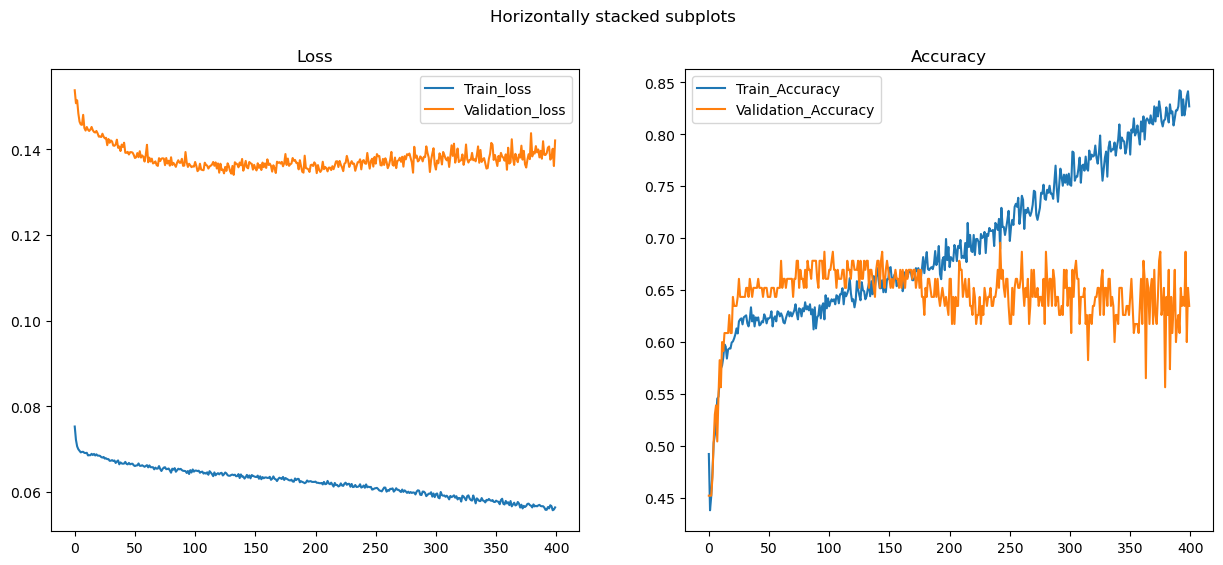

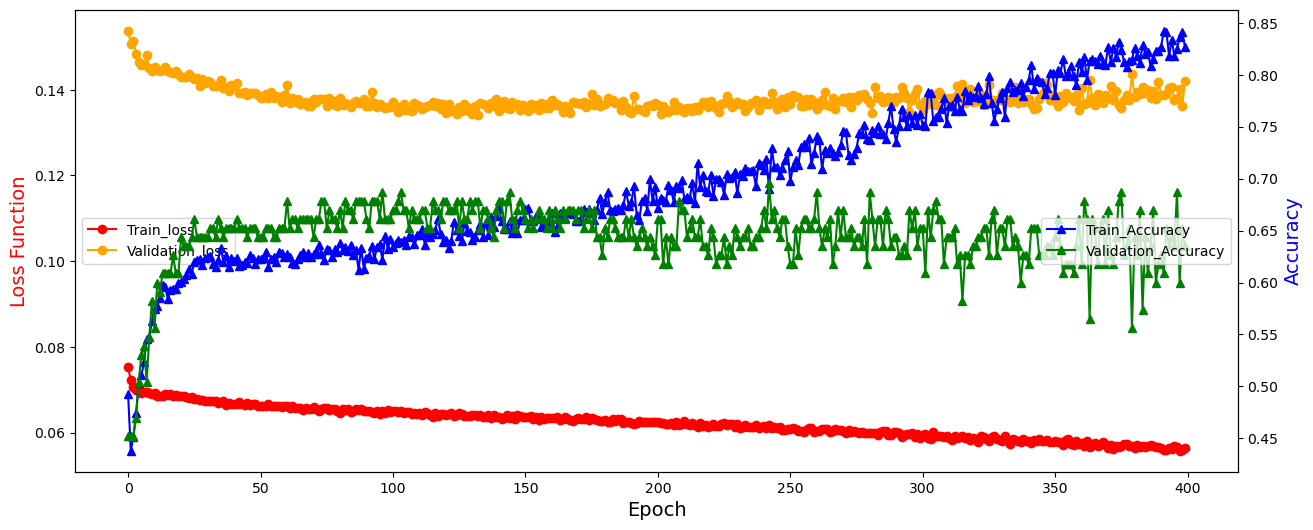

Current time: 319.006 minutes. Time expected till completion: 79.752 minutes

Epoch 401 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.055697934309334084
Val loss:  0.13486793507700381
train accuracy:  0.8433268858800773
Val accuracy:  0.6956521739130435
Current time: 319.787 minutes. Time expected till completion: 78.950 minutes

Epoch 402 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.056440466031345685
Val loss:  0.13805411276610002
train accuracy:  0.8278529980657641
Val accuracy:  0.6434782608695652
Current time: 320.564 minutes. Time expected till completion: 78.148 minutes

Epoch 403 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05622395711664536
Val loss:  0.1376253858856533
train accuracy:  0.8239845261121856
Val accuracy:  0.6695652173913044
Current time: 321.340 minutes. Time expected till completion: 77.345 minutes

Epoch 404 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.0568267747442773
Val loss:  0.1359677475431691
train accuracy:  0.8017408123791102
Val accuracy:  0.6347826086956522
Current time: 322.121 minutes. Time expected till completion: 76.544 minutes

Epoch 405 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.056332828286076886
Val loss:  0.1365636804829473
train accuracy:  0.8288201160541586
Val accuracy:  0.6695652173913044
Current time: 322.897 minutes. Time expected till completion: 75.741 minutes

Epoch 406 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.05548654851184823
Val loss:  0.13863994505094446
train accuracy:  0.8336557059961315
Val accuracy:  0.6521739130434783
Current time: 323.674 minutes. Time expected till completion: 74.939 minutes

Epoch 407 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.05650014157913179
Val loss:  0.14010133069494496
train accuracy:  0.8210831721470019
Val accuracy:  0.591304347826087
Current time: 324.451 minutes. Time expected till completion: 74.137 minutes

Epoch 408 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.056406848204666224
Val loss:  0.13833377153977103
train accuracy:  0.8220502901353965
Val accuracy:  0.6260869565217392
Current time: 325.227 minutes. Time expected till completion: 73.336 minutes

Epoch 409 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.05579928491747356
Val loss:  0.14854446234910385
train accuracy:  0.844294003868472
Val accuracy:  0.5652173913043478
Current time: 326.005 minutes. Time expected till completion: 72.534 minutes

Epoch 410 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.05644379426478417
Val loss:  0.1396054708439371
train accuracy:  0.8259187620889749
Val accuracy:  0.6086956521739131
Current time: 326.781 minutes. Time expected till completion: 71.732 minutes

Epoch 411 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.055976004100168696
Val loss:  0.1390223539393881
train accuracy:  0.8355899419729207
Val accuracy:  0.6434782608695652
Current time: 327.558 minutes. Time expected till completion: 70.931 minutes

Epoch 412 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.0567623900836856
Val loss:  0.14038907393165256
train accuracy:  0.8297872340425532
Val accuracy:  0.6173913043478261
Current time: 328.334 minutes. Time expected till completion: 70.130 minutes

Epoch 413 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.056157442598785606
Val loss:  0.13750839699869571
train accuracy:  0.8317214700193424
Val accuracy:  0.6434782608695652
Current time: 329.111 minutes. Time expected till completion: 69.329 minutes

Epoch 414 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05570702407530705
Val loss:  0.13981162568797237
train accuracy:  0.839458413926499
Val accuracy:  0.6173913043478261
Current time: 329.894 minutes. Time expected till completion: 68.529 minutes

Epoch 415 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.056451753271848135
Val loss:  0.1400795615237692
train accuracy:  0.8201160541586073
Val accuracy:  0.6521739130434783
Current time: 330.671 minutes. Time expected till completion: 67.728 minutes

Epoch 416 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.05654856597201276
Val loss:  0.13920622442079628
train accuracy:  0.8365570599613152
Val accuracy:  0.6695652173913044
Current time: 331.449 minutes. Time expected till completion: 66.927 minutes

Epoch 417 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.055257671921580626
Val loss:  0.14033374371735946
train accuracy:  0.8404255319148937
Val accuracy:  0.591304347826087
Current time: 332.226 minutes. Time expected till completion: 66.127 minutes

Epoch 418 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.056032119913304104
Val loss:  0.13948053899018661
train accuracy:  0.8346228239845261
Val accuracy:  0.6086956521739131
Current time: 333.002 minutes. Time expected till completion: 65.326 minutes

Epoch 419 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.055834627762523334
Val loss:  0.13899609265120133
train accuracy:  0.8471953578336557
Val accuracy:  0.6260869565217392
Current time: 333.779 minutes. Time expected till completion: 64.525 minutes

Epoch 420 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.05628154679008794
Val loss:  0.14057860892751942
train accuracy:  0.8413926499032882
Val accuracy:  0.6260869565217392
Current time: 334.557 minutes. Time expected till completion: 63.725 minutes

Epoch 421 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.056014338302889
Val loss:  0.14136586292930273
train accuracy:  0.8375241779497099
Val accuracy:  0.6086956521739131
Current time: 335.336 minutes. Time expected till completion: 62.925 minutes

Epoch 422 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.056183892880463736
Val loss:  0.13924508509428604
train accuracy:  0.8433268858800773
Val accuracy:  0.6695652173913044
Current time: 336.115 minutes. Time expected till completion: 62.126 minutes

Epoch 423 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.05517305108057461
Val loss:  0.13436000554457955
train accuracy:  0.8404255319148937
Val accuracy:  0.6782608695652174
Current time: 336.900 minutes. Time expected till completion: 61.327 minutes

Epoch 424 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.05547083778814836
Val loss:  0.14004790782928467
train accuracy:  0.8375241779497099
Val accuracy:  0.6260869565217392
Current time: 337.677 minutes. Time expected till completion: 60.527 minutes

Epoch 425 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.055957283514841846
Val loss:  0.1376668525778729
train accuracy:  0.8375241779497099
Val accuracy:  0.6521739130434783
Current time: 338.458 minutes. Time expected till completion: 59.728 minutes

Epoch 426 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05593882653883855
Val loss:  0.14115816095600958
train accuracy:  0.8346228239845261
Val accuracy:  0.6608695652173913
Current time: 339.255 minutes. Time expected till completion: 58.932 minutes

Epoch 427 of 500


100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


train loss:  0.05564226858620487
Val loss:  0.13856637322384377
train accuracy:  0.8433268858800773
Val accuracy:  0.6260869565217392
Current time: 340.052 minutes. Time expected till completion: 58.135 minutes

Epoch 428 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05508452976695343
Val loss:  0.13975701176601907
train accuracy:  0.8549323017408124
Val accuracy:  0.6260869565217392
Current time: 340.835 minutes. Time expected till completion: 57.337 minutes

Epoch 429 of 500


100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


train loss:  0.05522936438453497
Val loss:  0.13872567933538685
train accuracy:  0.8491295938104448
Val accuracy:  0.6434782608695652
Current time: 341.613 minutes. Time expected till completion: 56.537 minutes

Epoch 430 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.056211041355040826
Val loss:  0.1390092714973118
train accuracy:  0.8307543520309478
Val accuracy:  0.6521739130434783
Current time: 342.395 minutes. Time expected till completion: 55.739 minutes

Epoch 431 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05556429366309131
Val loss:  0.13903199589770773
train accuracy:  0.839458413926499
Val accuracy:  0.6260869565217392
Current time: 343.179 minutes. Time expected till completion: 54.941 minutes

Epoch 432 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.05654484125816153
Val loss:  0.1364734525265901
train accuracy:  0.8336557059961315
Val accuracy:  0.6347826086956522
Current time: 343.960 minutes. Time expected till completion: 54.142 minutes

Epoch 433 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.05575106965965183
Val loss:  0.13914042089296424
train accuracy:  0.8288201160541586
Val accuracy:  0.5652173913043478
Current time: 344.738 minutes. Time expected till completion: 53.343 minutes

Epoch 434 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.055973492173668954
Val loss:  0.13728605560634446
train accuracy:  0.8249516441005803
Val accuracy:  0.6695652173913044
Current time: 345.514 minutes. Time expected till completion: 52.544 minutes

Epoch 435 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.05477617545561357
Val loss:  0.13816631617753403
train accuracy:  0.8539651837524178
Val accuracy:  0.6434782608695652
Current time: 346.295 minutes. Time expected till completion: 51.745 minutes

Epoch 436 of 500


100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


train loss:  0.05576016374897911
Val loss:  0.13869133151095847
train accuracy:  0.8413926499032882
Val accuracy:  0.6260869565217392
Current time: 347.071 minutes. Time expected till completion: 50.946 minutes

Epoch 437 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.055044839587386846
Val loss:  0.13843776557756507
train accuracy:  0.8578336557059961
Val accuracy:  0.6695652173913044
Current time: 347.850 minutes. Time expected till completion: 50.148 minutes

Epoch 438 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.055253881953901664
Val loss:  0.1392567701961683
train accuracy:  0.8539651837524178
Val accuracy:  0.6347826086956522
Current time: 348.645 minutes. Time expected till completion: 49.352 minutes

Epoch 439 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.05507532332805877
Val loss:  0.13873297442560611
train accuracy:  0.8433268858800773
Val accuracy:  0.6347826086956522
Current time: 349.426 minutes. Time expected till completion: 48.553 minutes

Epoch 440 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.0552035796111972
Val loss:  0.14131447854249374
train accuracy:  0.8481624758220503
Val accuracy:  0.591304347826087
Current time: 350.208 minutes. Time expected till completion: 47.756 minutes

Epoch 441 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.05467537875562849
Val loss:  0.13845398996187294
train accuracy:  0.8713733075435203
Val accuracy:  0.6434782608695652
Current time: 350.985 minutes. Time expected till completion: 46.957 minutes

Epoch 442 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05555430682992105
Val loss:  0.13912561769070833
train accuracy:  0.8423597678916828
Val accuracy:  0.6347826086956522
Current time: 351.770 minutes. Time expected till completion: 46.160 minutes

Epoch 443 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05586488259599564
Val loss:  0.14212037117584891
train accuracy:  0.8471953578336557
Val accuracy:  0.6347826086956522
Current time: 352.549 minutes. Time expected till completion: 45.362 minutes

Epoch 444 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.05518718326114824
Val loss:  0.1397375630295795
train accuracy:  0.8481624758220503
Val accuracy:  0.6434782608695652
Current time: 353.330 minutes. Time expected till completion: 44.564 minutes

Epoch 445 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.054926485803187236
Val loss:  0.1410665258117344
train accuracy:  0.8684719535783365
Val accuracy:  0.6434782608695652
Current time: 354.111 minutes. Time expected till completion: 43.767 minutes

Epoch 446 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05501008368091841
Val loss:  0.14341687171355538
train accuracy:  0.8617021276595744
Val accuracy:  0.6
Current time: 354.899 minutes. Time expected till completion: 42.970 minutes

Epoch 447 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.055329252834246286
Val loss:  0.13701794354811958
train accuracy:  0.8423597678916828
Val accuracy:  0.6608695652173913
Current time: 355.682 minutes. Time expected till completion: 42.173 minutes

Epoch 448 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.05465834669956156
Val loss:  0.13972865965055384
train accuracy:  0.8588007736943907
Val accuracy:  0.6434782608695652
Current time: 356.464 minutes. Time expected till completion: 41.375 minutes

Epoch 449 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.05446596106431471
Val loss:  0.14271648811257404
train accuracy:  0.8617021276595744
Val accuracy:  0.6173913043478261
Current time: 357.245 minutes. Time expected till completion: 40.578 minutes

Epoch 450 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.054631979887444
Val loss:  0.1431763768196106
train accuracy:  0.8713733075435203
Val accuracy:  0.591304347826087
Current time: 358.034 minutes. Time expected till completion: 39.782 minutes

Epoch 451 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.05497694130792378
Val loss:  0.1408975259117458
train accuracy:  0.8617021276595744
Val accuracy:  0.6347826086956522
Current time: 358.818 minutes. Time expected till completion: 38.985 minutes

Epoch 452 of 500


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


train loss:  0.055148137434308256
Val loss:  0.13708608357802682
train accuracy:  0.8568665377176016
Val accuracy:  0.7043478260869566
Current time: 359.608 minutes. Time expected till completion: 38.188 minutes

Epoch 453 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05493970990642127
Val loss:  0.13783964281496794
train accuracy:  0.8549323017408124
Val accuracy:  0.6521739130434783
Current time: 360.405 minutes. Time expected till completion: 37.393 minutes

Epoch 454 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.05481544880617979
Val loss:  0.13959368208180303
train accuracy:  0.8491295938104448
Val accuracy:  0.6260869565217392
Current time: 361.189 minutes. Time expected till completion: 36.596 minutes

Epoch 455 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05489406600680988
Val loss:  0.13886845526487931
train accuracy:  0.851063829787234
Val accuracy:  0.6695652173913044
Current time: 361.984 minutes. Time expected till completion: 35.801 minutes

Epoch 456 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.05414417507108914
Val loss:  0.1404913622400035
train accuracy:  0.874274661508704
Val accuracy:  0.6347826086956522
Current time: 362.772 minutes. Time expected till completion: 35.004 minutes

Epoch 457 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05453879448154678
Val loss:  0.13985573053359984
train accuracy:  0.8665377176015474
Val accuracy:  0.6434782608695652
Current time: 363.556 minutes. Time expected till completion: 34.208 minutes

Epoch 458 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.05424550094964195
Val loss:  0.14428158946659253
train accuracy:  0.8684719535783365
Val accuracy:  0.6
Current time: 364.355 minutes. Time expected till completion: 33.412 minutes

Epoch 459 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.05496233430775729
Val loss:  0.13891116691672284
train accuracy:  0.8549323017408124
Val accuracy:  0.6608695652173913
Current time: 365.155 minutes. Time expected till completion: 32.617 minutes

Epoch 460 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05426490145449021
Val loss:  0.13992389751517254
train accuracy:  0.8810444874274661
Val accuracy:  0.6782608695652174
Current time: 365.945 minutes. Time expected till completion: 31.821 minutes

Epoch 461 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.054842036224656686
Val loss:  0.13906167071798572
train accuracy:  0.8626692456479691
Val accuracy:  0.6260869565217392
Current time: 366.727 minutes. Time expected till completion: 31.025 minutes

Epoch 462 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.054713265001197386
Val loss:  0.13982832535453465
train accuracy:  0.8597678916827853
Val accuracy:  0.6434782608695652
Current time: 367.507 minutes. Time expected till completion: 30.228 minutes

Epoch 463 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.05437443294423692
Val loss:  0.14184002824451614
train accuracy:  0.8723404255319149
Val accuracy:  0.6173913043478261
Current time: 368.289 minutes. Time expected till completion: 29.431 minutes

Epoch 464 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05463573964928751
Val loss:  0.14133046606312627
train accuracy:  0.8646034816247582
Val accuracy:  0.6173913043478261
Current time: 369.073 minutes. Time expected till completion: 28.635 minutes

Epoch 465 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.054319184799489474
Val loss:  0.14123456478118895
train accuracy:  0.867504835589942
Val accuracy:  0.6347826086956522
Current time: 369.857 minutes. Time expected till completion: 27.839 minutes

Epoch 466 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.054436565944258435
Val loss:  0.14055214291033538
train accuracy:  0.8723404255319149
Val accuracy:  0.6086956521739131
Current time: 370.643 minutes. Time expected till completion: 27.043 minutes

Epoch 467 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.05446736165817748
Val loss:  0.14120693725088368
train accuracy:  0.8636363636363636
Val accuracy:  0.6173913043478261
Current time: 371.428 minutes. Time expected till completion: 26.246 minutes

Epoch 468 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.0543447274649858
Val loss:  0.13838061353434686
train accuracy:  0.8713733075435203
Val accuracy:  0.6434782608695652
Current time: 372.206 minutes. Time expected till completion: 25.450 minutes

Epoch 469 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.054185154244332526
Val loss:  0.13943722299907518
train accuracy:  0.8617021276595744
Val accuracy:  0.6608695652173913
Current time: 372.986 minutes. Time expected till completion: 24.654 minutes

Epoch 470 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.05458395139852852
Val loss:  0.13837926646937496
train accuracy:  0.8617021276595744
Val accuracy:  0.6347826086956522
Current time: 373.765 minutes. Time expected till completion: 23.857 minutes

Epoch 471 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05443777533057119
Val loss:  0.14337667900583018
train accuracy:  0.8655705996131529
Val accuracy:  0.5478260869565217
Current time: 374.544 minutes. Time expected till completion: 23.061 minutes

Epoch 472 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.05471505319818537
Val loss:  0.14210947026377138
train accuracy:  0.8597678916827853
Val accuracy:  0.6173913043478261
Current time: 375.326 minutes. Time expected till completion: 22.265 minutes

Epoch 473 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05389316999704741
Val loss:  0.13996863468833592
train accuracy:  0.8878143133462283
Val accuracy:  0.6521739130434783
Current time: 376.104 minutes. Time expected till completion: 21.469 minutes

Epoch 474 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.054287240456796934
Val loss:  0.13883334553760032
train accuracy:  0.8607350096711799
Val accuracy:  0.6521739130434783
Current time: 376.884 minutes. Time expected till completion: 20.673 minutes

Epoch 475 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05440398116868054
Val loss:  0.1416171618129896
train accuracy:  0.8665377176015474
Val accuracy:  0.6347826086956522
Current time: 377.663 minutes. Time expected till completion: 19.877 minutes

Epoch 476 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.053571631242043734
Val loss:  0.14216140508651734
train accuracy:  0.8907156673114119
Val accuracy:  0.6347826086956522
Current time: 378.446 minutes. Time expected till completion: 19.081 minutes

Epoch 477 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.0550875761176908
Val loss:  0.1402446746826172
train accuracy:  0.8607350096711799
Val accuracy:  0.6434782608695652
Current time: 379.226 minutes. Time expected till completion: 18.286 minutes

Epoch 478 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.054201088283693764
Val loss:  0.13898264739824379
train accuracy:  0.8713733075435203
Val accuracy:  0.6260869565217392
Current time: 380.005 minutes. Time expected till completion: 17.490 minutes

Epoch 479 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05432331256525198
Val loss:  0.13818035851354185
train accuracy:  0.8578336557059961
Val accuracy:  0.6782608695652174
Current time: 380.783 minutes. Time expected till completion: 16.694 minutes

Epoch 480 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.05428426385617579
Val loss:  0.14073175762010656
train accuracy:  0.8713733075435203
Val accuracy:  0.6434782608695652
Current time: 381.561 minutes. Time expected till completion: 15.898 minutes

Epoch 481 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.05441826910529884
Val loss:  0.13974708059559698
train accuracy:  0.8655705996131529
Val accuracy:  0.6260869565217392
Current time: 382.341 minutes. Time expected till completion: 15.103 minutes

Epoch 482 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.054720595277255
Val loss:  0.1423952455105989
train accuracy:  0.8568665377176016
Val accuracy:  0.5826086956521739
Current time: 383.117 minutes. Time expected till completion: 14.307 minutes

Epoch 483 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.05367617675137474
Val loss:  0.14007990774901016
train accuracy:  0.8781431334622823
Val accuracy:  0.6434782608695652
Current time: 383.897 minutes. Time expected till completion: 13.512 minutes

Epoch 484 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.05353173215799682
Val loss:  0.13665059182954872
train accuracy:  0.8849129593810445
Val accuracy:  0.6608695652173913
Current time: 384.675 minutes. Time expected till completion: 12.717 minutes

Epoch 485 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.05396043666326792
Val loss:  0.1440699473671291
train accuracy:  0.8733075435203095
Val accuracy:  0.6
Current time: 385.454 minutes. Time expected till completion: 11.921 minutes

Epoch 486 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.054299287627697916
Val loss:  0.14088132381439208
train accuracy:  0.874274661508704
Val accuracy:  0.6608695652173913
Current time: 386.232 minutes. Time expected till completion: 11.126 minutes

Epoch 487 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.054191789670885185
Val loss:  0.1408793656722359
train accuracy:  0.8704061895551257
Val accuracy:  0.6086956521739131
Current time: 387.012 minutes. Time expected till completion: 10.331 minutes

Epoch 488 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.053753030484603496
Val loss:  0.14033331767372462
train accuracy:  0.8752417794970987
Val accuracy:  0.6347826086956522
Current time: 387.789 minutes. Time expected till completion: 9.536 minutes

Epoch 489 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.05408305563825242
Val loss:  0.14065520296926085
train accuracy:  0.8771760154738878
Val accuracy:  0.6347826086956522
Current time: 388.569 minutes. Time expected till completion: 8.741 minutes

Epoch 490 of 500


100%|██████████| 15/15 [00:02<00:00,  6.25it/s]


train loss:  0.053685617516073085
Val loss:  0.1393954899000085
train accuracy:  0.8800773694390716
Val accuracy:  0.6521739130434783
Current time: 389.347 minutes. Time expected till completion: 7.946 minutes

Epoch 491 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05436261785099539
Val loss:  0.1430539240007815
train accuracy:  0.8636363636363636
Val accuracy:  0.6086956521739131
Current time: 390.125 minutes. Time expected till completion: 7.151 minutes

Epoch 492 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.05370463652813688
Val loss:  0.1388550411099973
train accuracy:  0.8810444874274661
Val accuracy:  0.6782608695652174
Current time: 390.903 minutes. Time expected till completion: 6.356 minutes

Epoch 493 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.05387358981359397
Val loss:  0.14435978868733282
train accuracy:  0.8839458413926499
Val accuracy:  0.591304347826087
Current time: 391.681 minutes. Time expected till completion: 5.561 minutes

Epoch 494 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.053729659929958026
Val loss:  0.14200720890708593
train accuracy:  0.8771760154738878
Val accuracy:  0.6
Current time: 392.458 minutes. Time expected till completion: 4.767 minutes

Epoch 495 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.05374932819454997
Val loss:  0.13771146639533666
train accuracy:  0.8694390715667312
Val accuracy:  0.6521739130434783
Current time: 393.238 minutes. Time expected till completion: 3.972 minutes

Epoch 496 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.053820660197296734
Val loss:  0.14087435629056846
train accuracy:  0.879110251450677
Val accuracy:  0.6347826086956522
Current time: 394.016 minutes. Time expected till completion: 3.178 minutes

Epoch 497 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.053609879035322536
Val loss:  0.1404861455378325
train accuracy:  0.8762088974854932
Val accuracy:  0.6173913043478261
Current time: 394.796 minutes. Time expected till completion: 2.383 minutes

Epoch 498 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05392196025101313
Val loss:  0.13964060130326644
train accuracy:  0.8762088974854932
Val accuracy:  0.6434782608695652
Current time: 395.572 minutes. Time expected till completion: 1.589 minutes

Epoch 499 of 500


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


train loss:  0.053589352383143204
Val loss:  0.13794779984847358
train accuracy:  0.8781431334622823
Val accuracy:  0.6434782608695652
Current time: 396.352 minutes. Time expected till completion: 0.794 minutes

Epoch 500 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.05353830440593181
Val loss:  0.14447757213012033
train accuracy:  0.8820116054158608
Val accuracy:  0.6
Saving model checkpoint


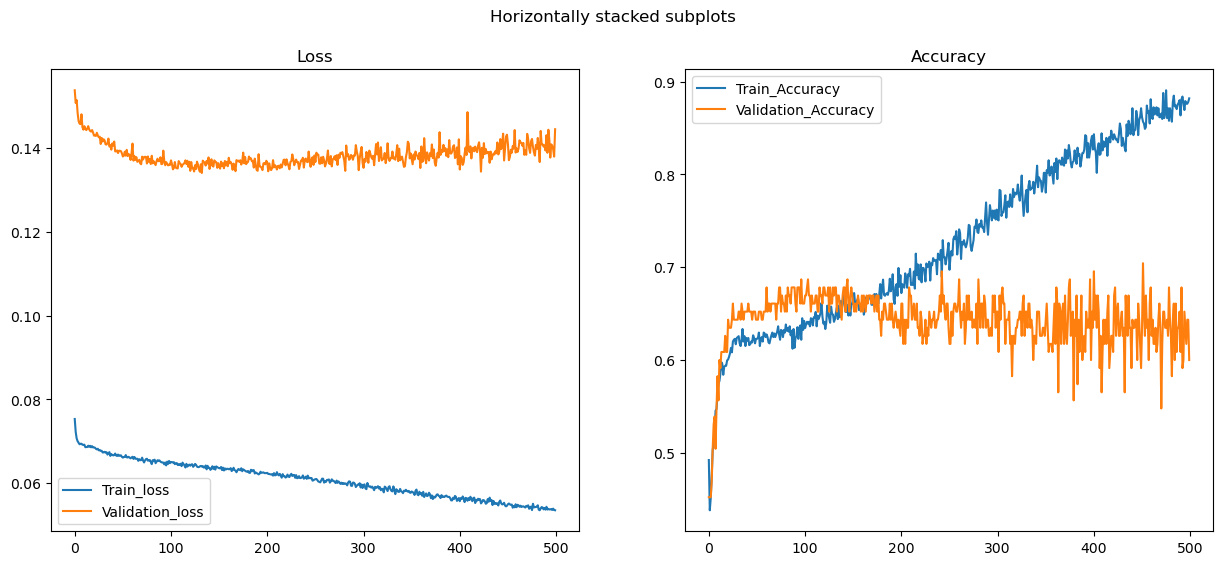

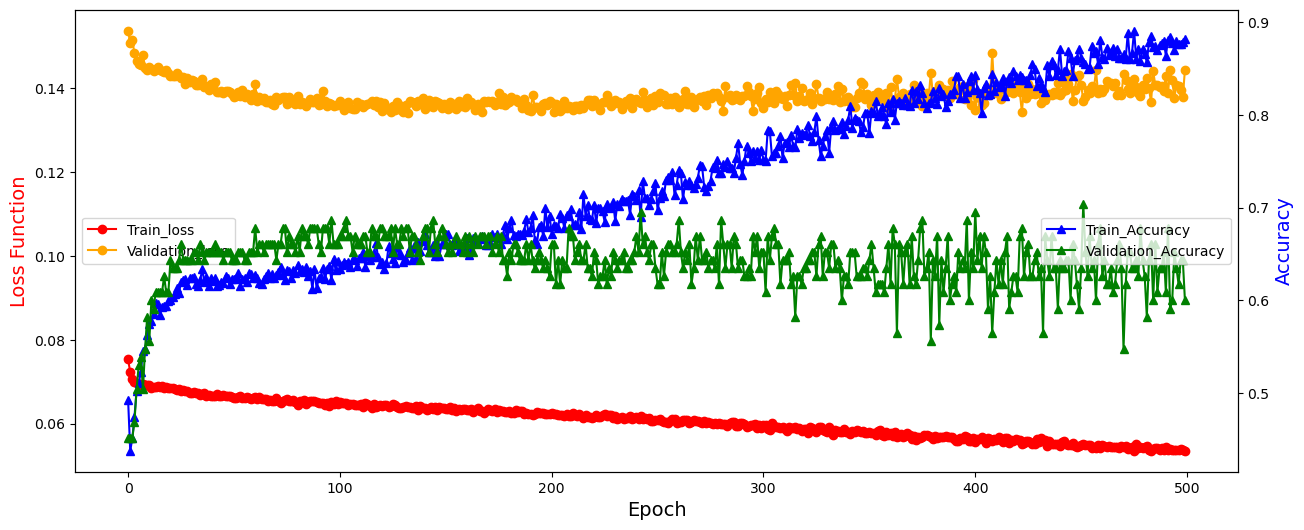

Current time: 397.329 minutes. Time expected till completion: 0.000 minutes
Finished training in: 397.329 minutes


In [14]:
#loader = train_loader # Use the train loader to train
#loader2 = valid_loader
# Main
train_loss, val_loss = [], []
train_accuracy, val_accuracy = [], []

val_loss_withDataAug, val_accuracy_withDataAug = [], []

# Load checkpoints
names = os.listdir(model_checkpoints)
for elem in names:
    if(elem=="metrics_losss_accuracy.csv"):
        print("Loading Metrics")
        dd = pd.read_csv(model_checkpoints + "metrics_losss_accuracy.csv")
        train_loss = dd["train_loss"].tolist()
        val_loss = dd["val_loss"].tolist()
        train_accuracy = dd["train_accuracy"].tolist()
        val_accuracy = dd["val_accuracy"].tolist()
        
# count time
start = time.time()
#PyTorch - Training the Model
for epoch in range(epoch_check, epochs):
    print()
    # Print current epoch
    print(f"Epoch {epoch + 1} of {epochs}")
    
    # Train model
    modelpy.train()
    running_loss=0
    total=0
    correct=0
    # loop for every training batch (one epoch)
    for bi, data in tqdm(enumerate(train_loader), total=len(train_loader)): # use tqdm package to track running time
        # Get the tensors
        images = data[0].to(device)# use the gpu
        labels = data[1].to(device)# use the gpu
        
        # in pytorch you have assign the zero for gradien in any sub epoch
        #optim.zero_grad()
        #create the output from the CNN base on the give batch images
        out = modelpy(images)
        # count the loss function 
        loss = criterion(out, labels)
        
        ######################
        optim.zero_grad()#################
        ######################
        # count the backpropagation
        loss.backward()
        # learning
        optim.step()
        
        # add new value to the main loss
        running_loss += loss.item()
        
        # calculate accuracy
        predictions = torch.argmax(out, dim=1)
        total += labels.size(0)
        correct +=(predictions == labels).sum().item()
        
        
    train_epoch_loss = running_loss/len(train_loader.dataset)
    
    train_epoch_accuracy = correct/total
    
    modelpy.eval()
    running_loss = 0.0
    correct=0
    total=0
    with torch.no_grad():
        for bi, data in tqdm(enumerate(valid_loader), total=len(valid_loader)):
            # Get the tensors
            images = data[0].to(device)# use the gpu
            label = data[1].to(device)# use the gpu
            
            #create the output from the CNN base on the give batch images
            outputs = modelpy(images)
            # count the loss function
            loss = criterion(outputs, label)
            
            # Add loss of each item (total items in a batch = batch size) .
            running_loss += loss.item()
            
            # calculate accuracy
            predictions = torch.argmax(outputs, dim=1)
            total += label.size(0)
            correct +=(predictions == label).sum().item()
            
            
    val_epoch_loss = running_loss/len(valid_loader.dataset) 
    val_epoch_accuracy = correct/total

    
    
    print("train loss: ", train_epoch_loss)
    print("Val loss: ", val_epoch_loss)
    print("train accuracy: ", train_epoch_accuracy)
    print("Val accuracy: ", val_epoch_accuracy)

    
    
    # save results
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_accuracy.append(val_epoch_accuracy)

    
    # Save model with all information every 100 epochs. Can be used 
    # resuming training. optim
    if (epoch+1) % checkpoints_save == 0: # checkpoints_save
        # Save Model
        print("Saving model checkpoint")
        end = time.time()
        time_elapsed = (end-start)+previous_time
        save_model(epoch, time_elapsed, modelpy, optim, criterion, path = model_checkpoints + "model_ckpt.pth")
        # save the metrics
        save_metrics(train_loss, val_loss, train_accuracy, val_accuracy, path = model_checkpoints + "metrics_losss_accuracy.csv")
        
        # save model at epoch
        save_model(epoch, time_elapsed, modelpy, optim, criterion, path = model_checkpoints + "model_ckpt_"+str(epoch+1)+".pth")
        
        # Cheack the evolution at this point
        plot_loss_accuracy(train_loss, val_loss, train_accuracy, val_accuracy)
        
        
    ep_time = time.time()
    print(f"Current time: {(((ep_time-start)+previous_time)/60):.3f} minutes. Time expected till completion: {(((((ep_time-start)+previous_time)/(epoch + 1)) * (epochs-(epoch + 1)))/60):.3f} minutes")
    
end = time.time()
print(f"Finished training in: {(((end-start)+previous_time)/60):.3f} minutes") 

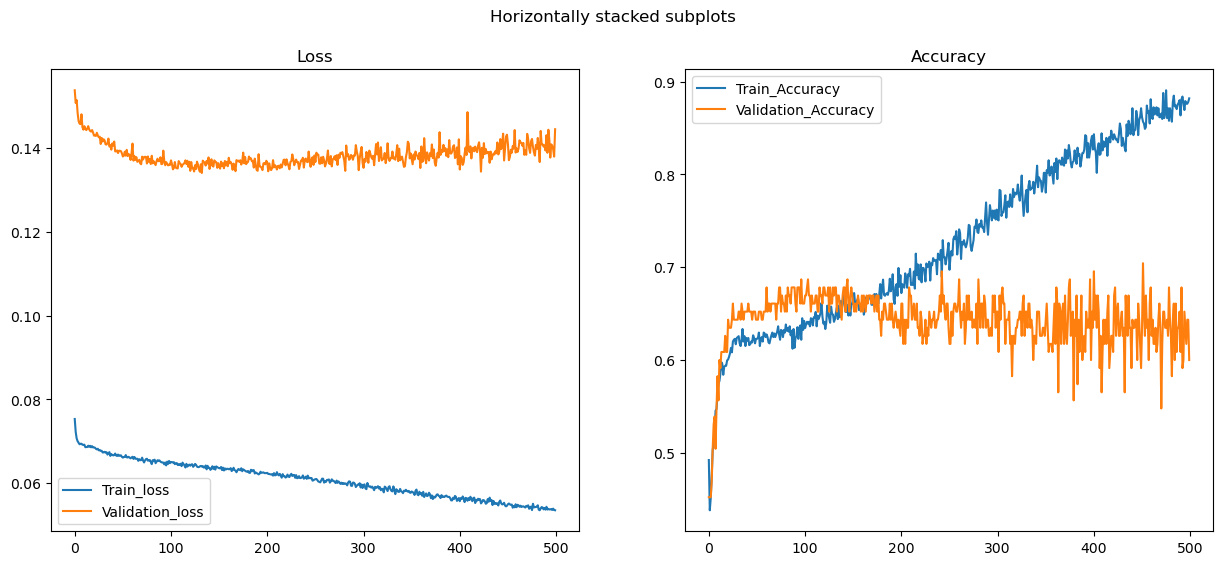

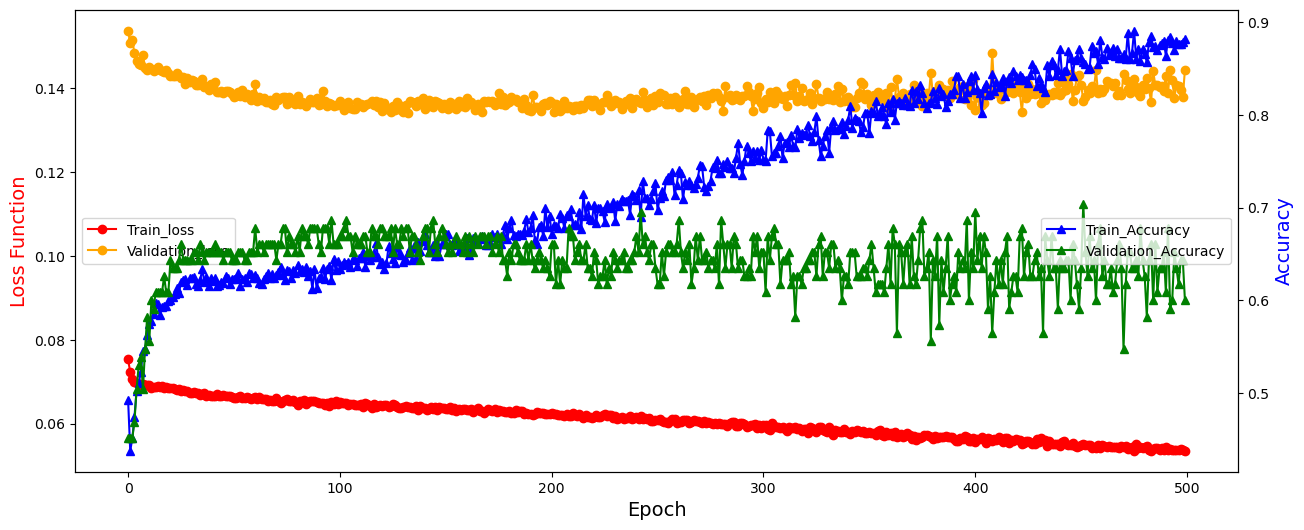

In [15]:
plot_loss_accuracy(train_loss, val_loss, train_accuracy, val_accuracy)

### Save Model

In [16]:
torch.save(modelpy.state_dict(), model_checkpoints + "saved_model_state_dict.pt")
torch.save(modelpy, model_checkpoints + "saved_model.pt")

# 3. Evaluate your model using the developed software

In [17]:
# Calculate accuracy for Validation and Train sets
accuracy_given_set(modelpy, train_loader, device, name="Train")
accuracy_given_set(modelpy, valid_loader, device, name="Validation")

Accuracy of the network on the 1034 Train instances: 91.29593810444874%
Accuracy of the network on the 115 Validation instances: 60.0%


In [18]:
# Import the test dataset
size_of_resized_img = (224,224) 
test_data, test_names = import_test_folder_dataset_2(test_data_path, resized_side=size_of_resized_img)
print("Dim of Data: ", test_data.shape)
print("Dim of Lables: ", test_names.shape)

Dim of Data:  (380, 224, 224, 3)
Dim of Lables:  (380,)


In [19]:
# Create the dataset object
test_Dataset = Data_test_2(test_data, test_names, img_transform_val)#img_transform_val
print("Test len: ",len(test_Dataset))

Test len:  380


In [20]:
# Make the predictions for the test dataset
predictions_list, names = make_predictions(modelpy=modelpy, dataset=test_Dataset, device=device)
len(predictions_list)

380

In [23]:
# Save the Predictions
save_predictions_as_csv(names=names, predictions=predictions_list, name="15_18Conv_6Res_512FChannels_6Batch_12DropOut.csv")#Conv_Pred_5000Epochs_SGD_DEEP_Architecture_18Conv_4FFNN_HigherChannels.c

# 4. Compare results with [SCTL paper](https://www.mdpi.com/2076-2615/12/7/886/htm). Requirement: performance is better than VGG16: 66.8%

# 5. Write a four-page paper report using the shared LaTex template. Upload your paper to ResearchGate or Arxiv, and put your paper link here.

# 6. Grading rubric

(1). Code ------- 20 points (you also need to upload your final model as a pt file)

(2). Grammer ---- 20 points

(3). Introduction & related work --- 10 points

(4). Method  ---- 20 points

(5). Results ---- 20 points

(6). Discussion - 10 points